# PG Group 5 Dubai

In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/train.csv")

In [ ]:
#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/train.csv'
df = pd.read_csv(url,index_col=0)
df

# 1. Data Exploration and Visualization by Inzamam

Print the first 5 rows


In [ ]:
# first five rows of the train dataset

df.head()

,overall,Review
0,5,I love these glitter pens. They sparkle deligh...
1,5,It works well with my machine. I use mostly c...
2,5,"This is a great assortment of colors, though t..."
3,5,Just what I was looking for.
4,5,I make 400 birds for the hospital each month.


# Summary statistics


In [ ]:
# describing the dataset
df.describe()

,overall
count,370863.000000
mean,4.566600
std,0.930377
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# printing columns
df.columns

Index(['overall', 'Review'], dtype='object')

# Distribution of review ratings

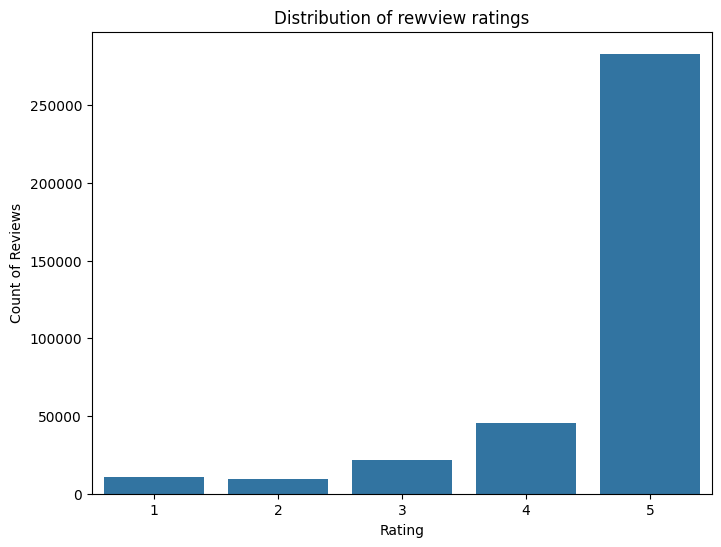

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='overall', data=df)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count of Reviews')
plt.show()

In [ ]:
df['overall'].value_counts()

5    283165
4     45832
3     21470
1     10772
2      9624
Name: overall, dtype: int64

#import required libraries

In [ ]:
#check for any null values

In [ ]:
df.isnull().sum()

overall    0
Review     0
dtype: int64

# Duplicates values handling

In [ ]:
df_duplicates = df.duplicated(subset=['Review'])
df_duplicates.value_counts()

False    275501
True      95362
dtype: int64

We will remove duplicates


In [ ]:
df = df.drop_duplicates(keep='first')

Print the description overall of the dataset


In [ ]:
print(df.describe())

             overall
count  277414.000000
mean        4.509185
std         0.984749
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000


# Visualize the distribution of overall ratings

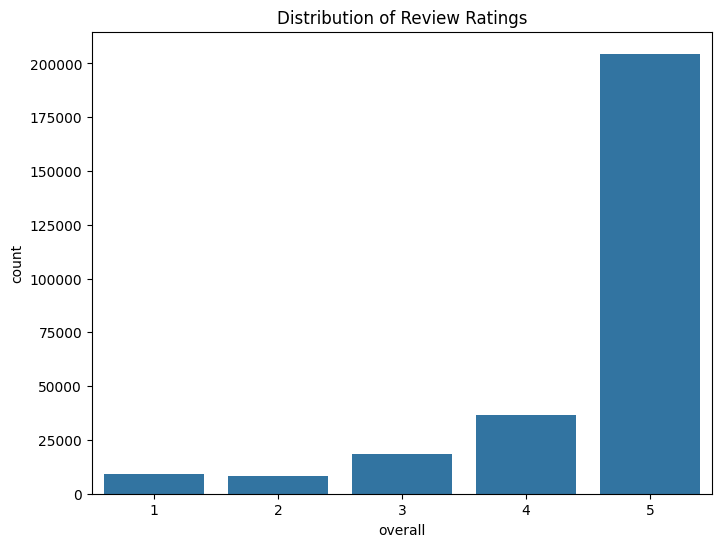

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Overall', data=df)
plt.title('Distribution of Review Ratings')
plt.show()

# Visualize the length of review texts

In [ ]:
df['review_text_length'] = df['Review'].apply(len)

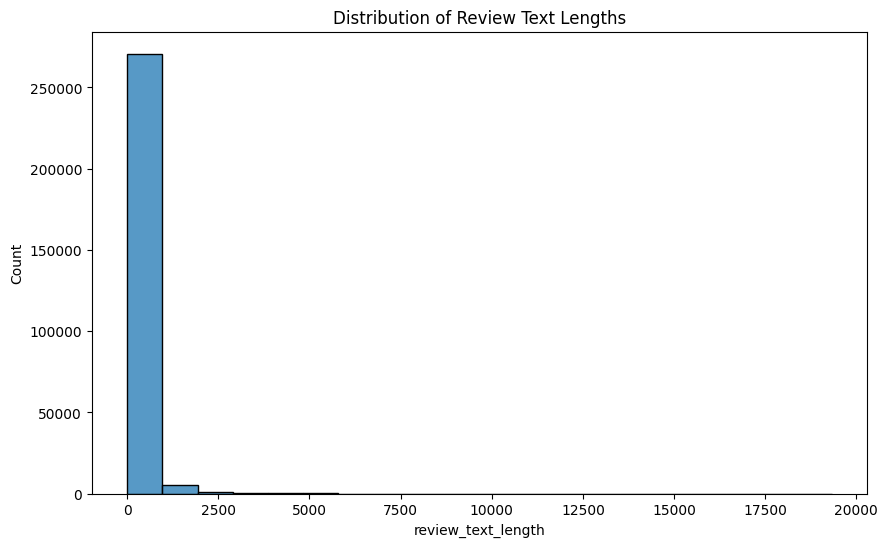

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_text_length', bins=20)
plt.title('Distribution of Review Text Lengths')
plt.show()

In [ ]:
# print data types
df.dtypes

overall                int64
Review                object
review_text_length     int64
dtype: object

import word cloud



In [ ]:
from wordcloud import WordCloud
from textwrap import wrap

# Print unique values in each column to find the one containing review text

In [ ]:
for column in df.columns:
    print(f"\nUnique values in review column '{column}':")
    print(df[column].unique())


Unique values in review column 'overall':
[5 1 3 4 2]

Unique values in review column 'Review':
["I love these glitter pens. They sparkle delightfully on the page, and they're brilliantly coloured even without the glitter! The darker colours do bleed through thin paper, however."
 'It works well with my machine.  I use mostly cones on it.'
 "This is a great assortment of colors, though there are a lot of pinks in the mix. Still, most colors are covered, and with all those spools, you're probably not going to have a problem finding a color that works for your project. I will probably buy this assortment again in the future once I've used most of this one."
 ... 'I love these dies they make great backgrounds for cards and'
 "I love Darice embossing folders.  Darcie's folders are very reasonable and emboss beautifully.  Received in perfect condition and on time."
 "I ordered these to add to my Earthy Markers that I previously ordered.\nI wanted the brighter primary colors and these fit t

print columns and first five rows


In [ ]:
df.columns


Index(['overall', 'Review', 'review_text_length'], dtype='object')

In [ ]:
df.head()

,overall,Review,review_text_length
0,5,I love these glitter pens. They sparkle deligh...,181
1,5,It works well with my machine. I use mostly c...,57
2,5,"This is a great assortment of colors, though t...",318
3,5,Just what I was looking for.,28
4,5,I make 400 birds for the hospital each month.,45


5
I love these glitter pens. They sparkle delightfully on the page, and they're brilliantly coloured even without the glitter! The darker colours do bleed through thin paper, however.


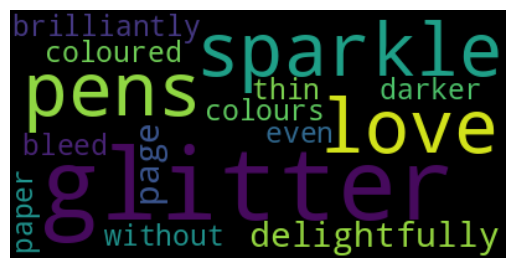

In [ ]:
# import required libraries.
from wordcloud import WordCloud
from textwrap import wrap
print(df.overall[0])
print(df.Review[0])
review_text = df.Review[0]
#Generate an image
wordcloud = WordCloud(max_words=100).generate(review_text)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()


5
It works well with my machine.  I use mostly cones on it.


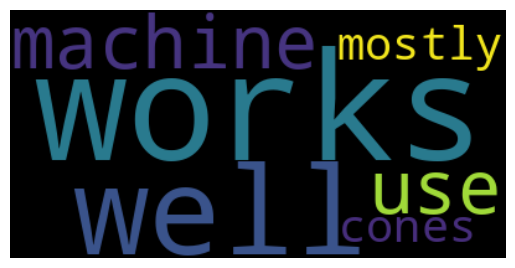

In [ ]:
print(df.overall[1])
print(df.Review[1])
review_text = df.Review[1]
#Generate an image
wordcloud = WordCloud(max_words=100).generate(review_text)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

5
This is a great assortment of colors, though there are a lot of pinks in the mix. Still, most colors are covered, and with all those spools, you're probably not going to have a problem finding a color that works for your project. I will probably buy this assortment again in the future once I've used most of this one.


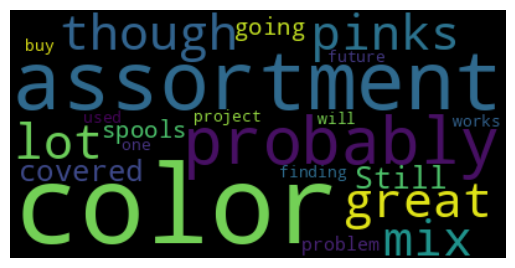

In [ ]:
print(df.overall[2])
print(df.Review[2])
review_text = df.Review[2]
#Generate an image
wordcloud = WordCloud(max_words=100).generate(review_text)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

1
I only received on piece of fabric.  Wasn't I suppose to receive more?


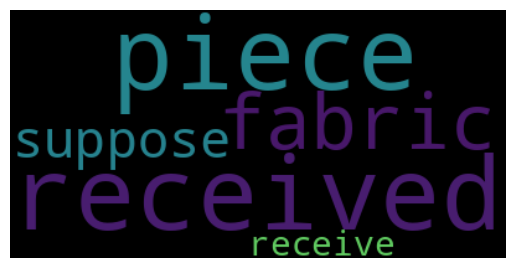

In [ ]:
print(df.overall[10])
print(df.Review[10])

review_text = df.Review[10]
#Generate an image
wordcloud = WordCloud(max_words=100).generate(review_text)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

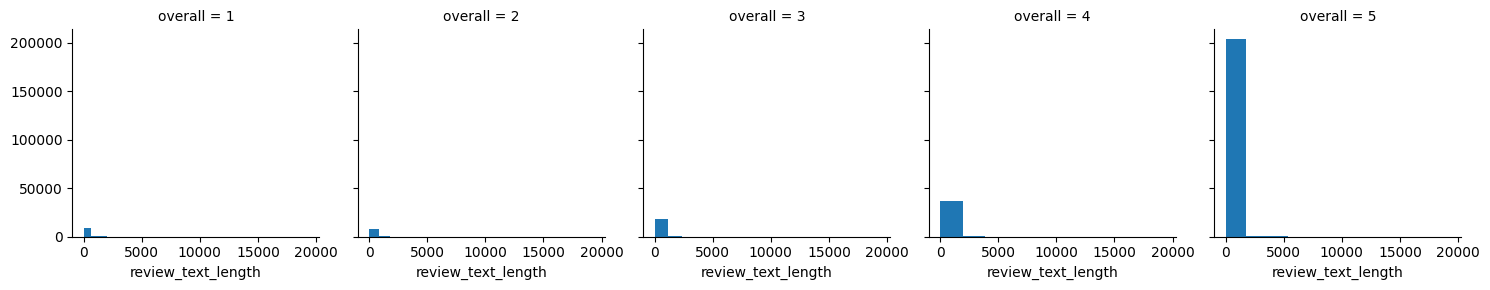

In [ ]:
g = sns.FacetGrid(df,col='overall')

g.map(plt.hist,'review_text_length')

<ipython-input-84-9a339e3a0cc6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='overall',y='review_text_length',data=df,palette='rainbow')


<Axes: xlabel='overall', ylabel='review_text_length'>

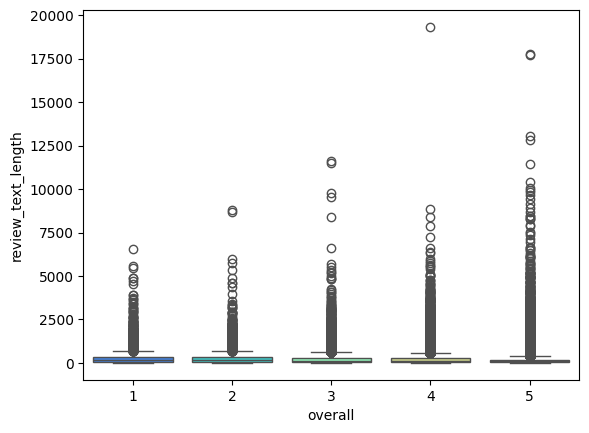

In [ ]:
sns.boxplot(x='overall',y='review_text_length',data=df,palette='rainbow')

<Axes: xlabel='review_text_length', ylabel='count'>

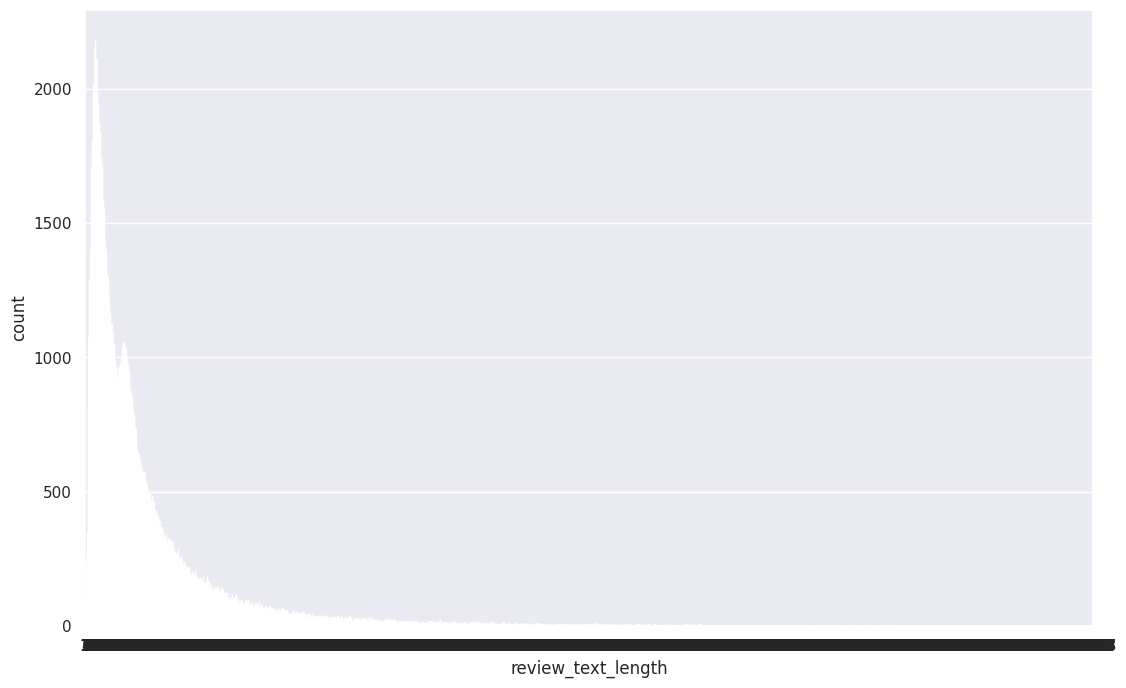

In [ ]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_palette("pastel")
sns.countplot(x='review_text_length',data=df)

Based on our findings. 5 rating reviews account for most reviews. All duplicates have been removed. Although there is class imbalance, we will not balance the dataset to avoid underfitting.

# 2. Text Processing and Normalization by Jitendra

stemming normalization technique

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize



# Download required NLTK resources


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def preprocess_text(text):
  text = text.lower()

In [ ]:
import re
import pandas as pd


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/textanalyticscw2/train.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

file_path = '/content/sample_data/train.csv'
if os.path.isfile(file_path):
    print("File exists")
else:
    print("File does not exist")

File does not exist


In [ ]:
#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/train.csv'
df = pd.read_csv(url,index_col=0)
df

In [ ]:
import re
import pandas as pd


In [ ]:
print(df.columns)

Index(['overall', 'Review'], dtype='object')


In [ ]:
review_text = row['overall']

In [ ]:
import pandas as pd

def preprocess_text(text):
    # Text preprocessing steps
    return preprocessed_text

for index, row in df.iterrows():
    if 'Review Text' in df.columns:
        review_text = row['Review Text']
        preprocessed_text = preprocess_text(review_text)
        df.at[index, 'Review Text'] = preprocessed_text
    elif 'Text' in df.columns:
        review_text = row['Text']
        preprocessed_text = preprocess_text(review_text)
        df.at[index, 'Text'] = preprocessed_text

In [ ]:
df = df.rename(columns={'ExistingColumnName': 'Review Text'})

In [ ]:
review_text = row['overall']

In [ ]:
for index, row in df.iterrows():
    if 'Review Text' in df.columns:
        review_text = row['Review Text']
        preprocessed_text = preprocess_text(review_text)
        df.at[index, 'Preprocessed Text'] = preprocessed_text

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Join stemmed tokens back into a string
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

# Load your data into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/textanalyticscw2/train.csv')

#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/train.csv'
df = pd.read_csv(url,index_col=0)
df

# Create a new column for preprocessed text
df['Preprocessed Text'] = ''

# Preprocess the text data
for index, row in df.iterrows():
    if 'Review Text' in df.columns:
        review_text = row['Review Text']
        preprocessed_text = preprocess_text(review_text)
        df.at[index, 'Preprocessed Text'] = preprocessed_text
    elif 'Text' in df.columns:
        review_text = row['Text']
        preprocessed_text = preprocess_text(review_text)
        df.at[index, 'Preprocessed Text'] = preprocessed_text

# Print the preprocessed text data
print(df['Preprocessed Text'])

0          
1          
2          
3          
4          
         ..
370858     
370859     
370860     
370861     
370862     
Name: Preprocessed Text, Length: 370863, dtype: object


In [ ]:
text = "This is a sample text with some URLs: https://example.com and HTML tags: <p>Hello</p>."
preprocessed_text = preprocess_text(text)
print(preprocessed_text)

sampl text url html tag hello


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove a smaller set of stop words
    stop_words = set(['a', 'an', 'the', 'and', 'or', 'but', 'is', 'not', 'were', 'was', 'are', 'am'])
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Join stemmed tokens back into a string
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

In [ ]:
# Update the 'Preprocessed Text' column with the modified preprocess_text function
for index, row in df.iterrows():
    if 'Review Text' in df.columns:
        review_text = row['Review Text']
        preprocessed_text = preprocess_text(review_text)
        df.at[index, 'Preprocessed Text'] = preprocessed_text
    elif 'Text' in df.columns:
        review_text = row['Text']
        preprocessed_text = preprocess_text(review_text)
        df.at[index, 'Preprocessed Text'] = preprocessed_text

# Create a TF-IDF vectorizer

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
# Create a new column for preprocessed text
df['Preprocessed Text'] = ''

# Preprocess the text data
for index, row in df.iterrows():
    if 'Review Text' in df.columns:
        review_text = row['Review Text']
        preprocessed_text = preprocess_text(review_text)
        df.at[index, 'Preprocessed Text'] = preprocessed_text
    elif 'Text' in df.columns:
        review_text = row['Text']
        preprocessed_text = preprocess_text(review_text)
        df.at[index, 'Preprocessed Text'] = preprocessed_text

In [ ]:
# Create a new column for preprocessed text
df['Preprocessed Text'] = ''

# Preprocess the text data
for index, row in df.iterrows():
    if 'Text' in df.columns:
        review_text = row['Text']
        preprocessed_text = preprocess_text(review_text)
        df.at[index, 'Preprocessed Text'] = preprocessed_text

In [ ]:
print(df['Preprocessed Text'].sample(10))

346716    
166838    
365743    
74172     
328833    
196574    
59945     
196997    
172442    
363062    
Name: Preprocessed Text, dtype: object


In [ ]:
def preprocess_text(text):
    # ... (other preprocessing steps)

    # Tokenize text
    tokens = word_tokenize(text)

    # ... (remaining steps)

In [ ]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove custom stop words
    custom_stop_words = ['a', 'an', 'the', 'and', 'or', 'but', 'is', 'not', 'were', 'was', 'are', 'am']
    stop_words = set(custom_stop_words)
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Join stemmed tokens back into a string
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

In [ ]:
# Update the 'Preprocessed Text' column with the modified preprocess_text function
for index, row in df.iterrows():
    if 'Text' in df.columns:
        review_text = row['Text']
        preprocessed_text = preprocess_text(review_text)
        df.at[index, 'Preprocessed Text'] = preprocessed_text

In [ ]:
print(df.columns)

Index(['overall', 'Review', 'Preprocessed Text'], dtype='object')


In [ ]:
print(df['Preprocessed Text'].sample(10))

274274    
108621    
261607    
262262    
116851    
149966    
343904    
251649    
359487    
254337    
Name: Preprocessed Text, dtype: object


In [ ]:
df['Preprocessed Text'] = df['Preprocessed Text'].astype(str)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()  # Initialize the vectorizer


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample preprocessed texts (replace this with your actual preprocessed data)
preprocessed_texts = [
    "this is a sample document",
    "another document for testing",
    "yet another document"
]

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit-transform the preprocessed texts
X = vectorizer.fit_transform(preprocessed_texts)

# Check the shape of the transformed matrix
print("Shape of transformed matrix:", X.shape)

# Optionally, you can also inspect the vocabulary generated by the vectorizer
print("Vocabulary:", vectorizer.get_feature_names_out())


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer



# Sample preprocessed texts (replace this with actual preprocessed data)

In [ ]:
preprocessed_texts = [
    "this is a sample document",
    "another document for testing",
    "yet another document"
]

 Initialize the TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()

 Fit-transform the preprocessed texts

In [ ]:
X = vectorizer.fit_transform(preprocessed_texts)

In [ ]:
# Check the shape of the transformed matrix
print("Shape of transformed matrix:", X.shape)

# Optionally, you can also inspect the vocabulary generated by the vectorizer
print("Vocabulary:", vectorizer.get_feature_names_out())

Shape of transformed matrix: (3, 8)
Vocabulary: ['another' 'document' 'for' 'is' 'sample' 'testing' 'this' 'yet']


In [ ]:
preprocessed_texts = df['Preprocessed Text'].tolist()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample preprocessed texts (replace this with your actual preprocessed data)
preprocessed_texts = [
    "this is a sample document",
    "another document for testing",
    "yet another document"
]

# Initialize the TfidfVectorizer with additional parameters min_df ignores terms that appear less than one document
vectorizer = TfidfVectorizer(min_df=1, stop_words=None)

# Fit-transform the preprocessed texts
X = vectorizer.fit_transform(preprocessed_texts)

# Check the shape of the transformed matrix
print("Shape of transformed matrix:", X.shape)


Shape of transformed matrix: (3, 8)


In [ ]:
#import the libraries and define functions for stopwords, lemma, and stem
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
import spacy
stemmer = PorterStemmer()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

After importing libraries, print the original review,

In [ ]:
df.Review[1]

'It works well with my machine.  I use mostly cones on it.'

we use stemming to reduce each word to their root word.

In [ ]:
nlp = spacy.load("en_core_web_sm")
def stem_words(text):
    words = word_tokenize(text)
    stem_words = [stemmer.stem(token) for token in words]
    return " ".join(stem_words)

In [ ]:
stem_words(df.Review[1])

'it work well with my machin . i use mostli cone on it .'

Lemma reduce word to base word. Works similar to stemming but is more accurate and provides more context.

In [ ]:
def lem_words(text):
    doc = nlp(text)
    lem_words = [token.lemma_ for token in doc]
    return " ".join(lem_words)

In [ ]:
lem_words(df.Review[1])

'it work well with my machine .   I use mostly cone on it .'

stop words removes unnessary words that are not required.

In [ ]:
def stop_words(text):
    doc = nlp(text)
    no_stop_words = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(no_stop_words)

In [ ]:
stop_words(df.Review[1])

'works machine   use cones'

# 3.	Vector space Model and feature representation: by Avishkar Bhosale. Add here

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
data = pd.read_csv('train.csv')

#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/train.csv'
data = pd.read_csv(url,index_col=0)
data

In [ ]:
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return ' '.join(tokens)

In [ ]:
data['clean_review'] = data['Review'].apply(preprocess)

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['clean_review'])

In [ ]:
normalized_tfidf_matrix = normalize(tfidf_matrix)

In [ ]:
print("Sparse TF-IDF Matrix:")
print(normalized_tfidf_matrix)

Sparse TF-IDF Matrix:
  (0, 24999)	0.17148058460974583
  (0, 35002)	0.1374590278638702
  (0, 48946)	0.17776516505521656
  (0, 8576)	0.23466324591352103
  (0, 12412)	0.25629804513151316
  (0, 14808)	0.24016748342712316
  (0, 53761)	0.16179000438624466
  (0, 18984)	0.14572137220824835
  (0, 12405)	0.3241593795727854
  (0, 9464)	0.3257468127687998
  (0, 39400)	0.16326183507904013
  (0, 34796)	0.2172012516928221
  (0, 15358)	0.36055371888012583
  (0, 45416)	0.24076663543702706
  (0, 35623)	0.1856025215205573
  (0, 22507)	0.4212592179299667
  (0, 29528)	0.0967265136933654
  (1, 12868)	0.651968311458202
  (1, 31969)	0.515198868951526
  (1, 51707)	0.21961317615985426
  (1, 29852)	0.3418703860146313
  (1, 53174)	0.2550639723171194
  (1, 54044)	0.28168157258579934
  (2, 33865)	0.11522163195594803
  (2, 51715)	0.1175794991506242
  :	:
  (370862, 43255)	0.21857898458549935
  (370862, 3676)	0.21823845983428622
  (370862, 46987)	0.1621833852118693
  (370862, 11548)	0.1393883375779756
  (370862, 485

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(data['clean_review'].tolist(), min_count=5, window=5, vector_size=300)

In [ ]:
def get_word_embedding(word, model):

  try:
    return model.wv[word]
  except KeyError:

    return np.zeros(model.vector_size)

In [ ]:
import numpy as np
word_embedding = get_word_embedding("word", model)

In [ ]:
word = "favorite"
embedding = get_word_embedding(word, model)

print(f"Embedding for '{word}':")
print(embedding)

Embedding for 'favorite':
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from gensim.models import FastText

model = FastText(data['clean_review'].tolist(), window=5, vector_size=300, min_count=1)
word_embedding = model.wv['word']

In [ ]:
import re
def clean_text(text):
  text = re.sub(r'[^\w\s]', '', text.lower())
  return text

data['clean_review'] = data['Review'].apply(clean_text)

In [ ]:
processed_reviews = []
for review in data['clean_review' if 'clean_review' in data else 'Review']:
  words = review.split()
  processed_reviews.append(words)

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(processed_reviews, min_count=5, window=5, vector_size=300)

In [ ]:
word_embedding = model.wv['love']

In [ ]:
word_embedding = model.wv['love']
print(f"Embedding for 'love':")
print(word_embedding)

Embedding for 'love':
[-1.56709409e+00  2.45147850e-03  1.14653790e+00 -7.54518926e-01
  5.15871763e-01 -1.35320950e+00 -8.94398093e-01  8.70628715e-01
  7.03364372e-01 -6.22882783e-01  9.28744266e-04  1.56831563e-01
  5.36192954e-01  1.36411583e+00  2.87656724e-01 -3.56127232e-01
 -6.29240215e-01  1.05219340e+00  1.18428957e+00  2.02435385e-02
  1.26419997e+00 -1.14756155e+00 -2.42793351e-01 -6.15602732e-01
 -1.21329002e-01 -3.37466300e-01 -1.27334726e+00  1.43879700e+00
 -3.84649783e-01 -4.39892948e-01  1.57485938e+00  1.50764084e+00
 -2.12673277e-01 -5.62646806e-01  9.86215472e-01 -8.60942125e-01
  7.25003541e-01 -1.65423810e+00 -5.13758063e-01  4.60696608e-01
 -2.13261986e+00 -1.25765753e+00  1.32595575e+00 -7.88215041e-01
  4.70514387e-01  9.24282253e-01  2.48533651e-01 -1.78331363e+00
 -2.52268642e-01  9.39132422e-02  5.25949478e-01  1.56569934e+00
  8.78739297e-01  7.63658285e-01  1.07766354e+00 -5.61429262e-01
 -2.95694202e-01 -5.56193948e-01 -6.80393457e-01  1.28213739e+00
  1

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
pca = PCA(n_components=2)
embedding_matrix_2d = pca.fit_transform(model.wv.vectors)

In [ ]:
import gensim


word = "love"


if word in model.wv.key_to_index:
  word_index = model.wv.key_to_index[word]
  word_embedding = model.wv[word]

  print(f"Embedding for '{word}':")
  print(word_embedding)
else:
  print(f"Word '{word}' not found in vocabulary.")

Embedding for 'love':
[-1.56709409e+00  2.45147850e-03  1.14653790e+00 -7.54518926e-01
  5.15871763e-01 -1.35320950e+00 -8.94398093e-01  8.70628715e-01
  7.03364372e-01 -6.22882783e-01  9.28744266e-04  1.56831563e-01
  5.36192954e-01  1.36411583e+00  2.87656724e-01 -3.56127232e-01
 -6.29240215e-01  1.05219340e+00  1.18428957e+00  2.02435385e-02
  1.26419997e+00 -1.14756155e+00 -2.42793351e-01 -6.15602732e-01
 -1.21329002e-01 -3.37466300e-01 -1.27334726e+00  1.43879700e+00
 -3.84649783e-01 -4.39892948e-01  1.57485938e+00  1.50764084e+00
 -2.12673277e-01 -5.62646806e-01  9.86215472e-01 -8.60942125e-01
  7.25003541e-01 -1.65423810e+00 -5.13758063e-01  4.60696608e-01
 -2.13261986e+00 -1.25765753e+00  1.32595575e+00 -7.88215041e-01
  4.70514387e-01  9.24282253e-01  2.48533651e-01 -1.78331363e+00
 -2.52268642e-01  9.39132422e-02  5.25949478e-01  1.56569934e+00
  8.78739297e-01  7.63658285e-01  1.07766354e+00 -5.61429262e-01
 -2.95694202e-01 -5.56193948e-01 -6.80393457e-01  1.28213739e+00
  1

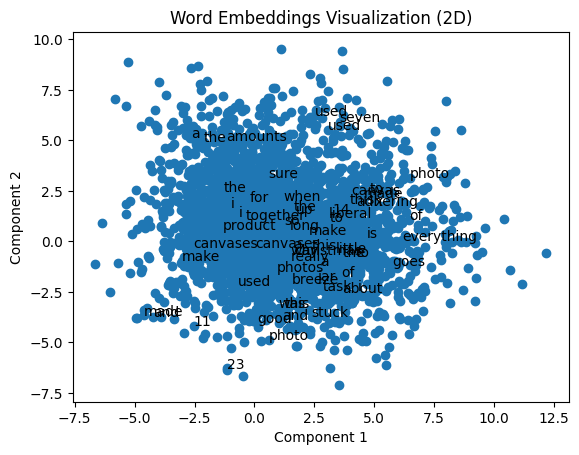

In [ ]:
x = embedding_matrix_2d[:, 0]
y = embedding_matrix_2d[:, 1]
plt.scatter(x, y)
for i, word in enumerate(words):
  plt.annotate(word, (x[i], y[i]))

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Word Embeddings Visualization (2D)")
plt.show()

In [ ]:
#Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
c_vect = CountVectorizer()
c_vect.fit(df.Review)

CountVectorizer()

In [ ]:
len(c_vect.vocabulary_)

54935

returns frequency count for each term

In [ ]:
c_vect.vocabulary_

{'love': 29545,
 'these': 48868,
 'glitter': 22516,
 'pens': 35643,
 'they': 48906,
 'sparkle': 45437,
 'delightfully': 15363,
 'on': 33873,
 'the': 48720,
 'page': 34816,
 'and': 4693,
 're': 39420,
 'brilliantly': 9467,
 'coloured': 12409,
 'even': 18993,
 'without': 53787,
 'darker': 14813,
 'colours': 12416,
 'do': 16668,
 'bleed': 8579,
 'through': 49185,
 'thin': 48968,
 'paper': 35022,
 'however': 25013,
 'it': 26784,
 'works': 54070,
 'well': 53197,
 'with': 53768,
 'my': 32364,
 'machine': 29869,
 'use': 51730,
 'mostly': 31986,
 'cones': 12872,
 'this': 49029,
 'is': 26736,
 'great': 23116,
 'assortment': 5609,
 'of': 33652,
 'colors': 12385,
 'though': 49088,
 'there': 48832,
 'are': 5230,
 'lot': 29503,
 'pinks': 36293,
 'in': 25695,
 'mix': 31581,
 'still': 46562,
 'most': 31985,
 'covered': 13657,
 'all': 4283,
 'those': 49083,
 'spools': 45781,
 'you': 54673,
 'probably': 37836,
 'not': 33207,
 'going': 22678,
 'to': 49531,
 'have': 24063,
 'problem': 37849,
 'finding': 

In [ ]:
#pos part of speech


doc = nlp(df.Review[500])

for token in doc:
    print(token," | ", token.pos_, " | ", spacy.explain(token.pos_), " | ", token.tag_, " | ", spacy.explain(token.tag_))

Nice  |  ADJ  |  adjective  |  JJ  |  adjective (English), other noun-modifier (Chinese)
little  |  ADJ  |  adjective  |  JJ  |  adjective (English), other noun-modifier (Chinese)
collection  |  NOUN  |  noun  |  NN  |  noun, singular or mass
for  |  ADP  |  adposition  |  IN  |  conjunction, subordinating or preposition
charm  |  NOUN  |  noun  |  NN  |  noun, singular or mass
bracelets  |  NOUN  |  noun  |  NNS  |  noun, plural
or  |  CCONJ  |  coordinating conjunction  |  CC  |  conjunction, coordinating
necklace  |  NOUN  |  noun  |  NN  |  noun, singular or mass
.  |  PUNCT  |  punctuation  |  .  |  punctuation mark, sentence closer


In [ ]:
#NER
from spacy import displacy
for ent in doc.ents:

  print(ent.text, " | ", ent.label_)
displacy.render(doc, style="ent")

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [ ]:
base_token = nlp("cones")
base_token.vector.shape

(96,)

In [ ]:
#word embeddings
doc = nlp(df.Review[1])

for token in doc:
    print(f"{token.text} <-> {base_token.text}:", token.similarity(base_token))

It <-> cones: 0.13480070235815345
works <-> cones: 0.3105358820985588
well <-> cones: -0.10515058462228596
with <-> cones: -0.0557931761097077
my <-> cones: -0.052922350246540614
machine <-> cones: 0.07361505158089236
. <-> cones: 0.008085444000586152
  <-> cones: -0.06548885578692716
I <-> cones: 0.07585873684812636
use <-> cones: 0.07703803819651554
mostly <-> cones: 0.01601196645028341
cones <-> cones: 0.44827995383858976
on <-> cones: 0.06387099545073516
it <-> cones: 0.054147061742956436
. <-> cones: 0.026516810197532388


<ipython-input-45-554cad350104>:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(f"{token.text} <-> {base_token.text}:", token.similarity(base_token))


In [ ]:
#bag of words n_gram
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv=CountVectorizer(ngram_range=(2,3))
tfidf_v = TfidfVectorizer(ngram_range=(1,3))
cv.fit(["The Rolls Royce Art Collection is stunning and rich"])
tfidf_v.fit(["The cloth could be better for painting although i prefer the silk one"])
cv.vocabulary_


{'the rolls': 13,
 'rolls royce': 7,
 'royce art': 9,
 'art collection': 1,
 'collection is': 3,
 'is stunning': 5,
 'stunning and': 11,
 'and rich': 0,
 'the rolls royce': 14,
 'rolls royce art': 8,
 'royce art collection': 10,
 'art collection is': 2,
 'collection is stunning': 4,
 'is stunning and': 6,
 'stunning and rich': 12}

In [ ]:
tfidf_v.vocabulary_

{'the': 27,
 'cloth': 9,
 'could': 12,
 'be': 3,
 'better': 6,
 'for': 15,
 'painting': 19,
 'although': 0,
 'prefer': 22,
 'silk': 25,
 'one': 18,
 'the cloth': 28,
 'cloth could': 10,
 'could be': 13,
 'be better': 4,
 'better for': 7,
 'for painting': 16,
 'painting although': 20,
 'although prefer': 1,
 'prefer the': 23,
 'the silk': 30,
 'silk one': 26,
 'the cloth could': 29,
 'cloth could be': 11,
 'could be better': 14,
 'be better for': 5,
 'better for painting': 8,
 'for painting although': 17,
 'painting although prefer': 21,
 'although prefer the': 2,
 'prefer the silk': 24,
 'the silk one': 31}

# FastText

As per fasttext documentation concatenate both review and overall.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/lemma_cw2_train.csv')



In [ ]:
#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/lemma_cw2_train.csv'
df = pd.read_csv(url,index_col=0)
df

In [ ]:
df['overall'] = '__label__' + df['overall'].astype(str)

In [ ]:
df['overall_review'] = df['overall'] + " " + df['Review']

In [ ]:
df

,Unnamed: 0,overall,Review,review_text_length,overall_review
0,0,__label__5,I love these glitter pen . they sparkle deligh...,181,__label__5 I love these glitter pen . they spa...
1,1,__label__5,it work well with my machine .use mostly cone ...,57,__label__5 it work well with my machine .use m...
2,2,__label__5,"this begreat assortment of color , though ther...",318,"__label__5 this begreat assortment of color , ..."
3,3,__label__5,just whatbe look for .,28,__label__5 just whatbe look for .
4,4,__label__5,I make 400 bird for the hospital each month .,45,__label__5 I make 400 bird for the hospital ea...
...,...,...,...,...,...
277409,370856,__label__5,these be the perfect application bottle for di...,343,__label__5 these be the perfect application bo...
277410,370857,__label__4,I mainly purchase this for the roll - up penci...,796,__label__4 I mainly purchase this for the roll...
277411,370858,__label__5,I love these die they make great background fo...,59,__label__5 I love these die they make great ba...
277412,370859,__label__5,I love Darice emboss folder . Darcie 's folder...,138,__label__5 I love Darice emboss folder . Darci...


In [ ]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(df, test_size=0.2)

In [ ]:
train_dataset.shape

(221931, 5)

In [ ]:
test_dataset.shape

(55483, 5)

Save train and test data to csv file

In [ ]:
train_dataset.to_csv('train_review',columns=['overall_review'], index=False, header=False)
test_dataset.to_csv('test_review',columns=['overall_review'], index=False, header=False)

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227138 sha256=50199c54d62cfdba2f6f9a476e0d7dfd8e6f2b40d20a08b61d970e13acfb24f4
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


Train and test the model

In [ ]:
import fasttext

model=fasttext.train_supervised('/content/train_review')

In [ ]:
import fasttext

model.test('/content/test_review')

(33012, 0.8020113897976493, 0.8020113897976493)

In [ ]:
print(df['Review'][400])

this be the third american Dream needlework framehave purchase .love all their product . they have all be well make , problem free and exactly whatwant !


In [ ]:
print(df['Review'][400])

this be the third american Dream needlework framehave purchase .love all their product . they have all be well make , problem free and exactly whatwant !


In [ ]:
model.predict(df['Review'][400])

(('__label__5',), array([0.96896815]))

In [ ]:
model.get_nearest_neighbors('yarn')

[(0.9629080295562744, 'withhinge'),
 (0.9448368549346924, 'stay'),
 (0.9430010914802551, 'withcotton'),
 (0.938993513584137, 'facepainting'),
 (0.9346031546592712, 'beget'),
 (0.9323205351829529, 'upnew'),
 (0.9251673817634583, 'wantpermanent'),
 (0.9232053756713867, 'inclassroom'),
 (0.9158706068992615, 'for.'),
 (0.9124107956886292, 'forsocan')]

In [ ]:
model.save_model("model_fasttext.model") #save your models

# 4.	Model training, selection and hyperparameter tuning and evaluation by Nihal Patel

In [ ]:
#Conduct the experiment with four models
df["Review"] = df["Review"].apply(lem_words)
df["Review"]

import re
df['Review'] = df['Review'].apply(lambda x:re.sub(r'http\S+','',x))

In [ ]:
df['Review'] = df['Review'].apply(lambda x:re.sub(r'<br>','',x))

In [ ]:
df['Review'] = df['Review'].apply(lambda x:re.sub(r'\s+',' ',x, flags=re.I))

In [ ]:
df['Review'] = df['Review'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+','',x))

In [ ]:
df.to_csv('lemma_cw2_train.csv')

reading pre processed lemma dataset file

In [ ]:
import pandas as pd
df = pd.read_csv('lemma_cw2_train.csv', encoding='utf-8')

In [ ]:
#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/lemma_cw2_train.csv'
df = pd.read_csv(url,index_col=0)
df

Remove any null values

In [ ]:
df.isnull().sum()

Unnamed: 0             0
overall                0
Review                16
review_text_length     0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Unnamed: 0            0
overall               0
Review                0
review_text_length    0
dtype: int64

In [ ]:
df

,Unnamed: 0,overall,Review,review_text_length
0,0,5,I love these glitter pen . they sparkle deligh...,181
1,1,5,it work well with my machine .use mostly cone ...,57
2,2,5,"this begreat assortment of color , though ther...",318
3,3,5,just whatbe look for .,28
4,4,5,I make 400 bird for the hospital each month .,45
...,...,...,...,...
277409,370856,5,these be the perfect application bottle for di...,343
277410,370857,4,I mainly purchase this for the roll - up penci...,796
277411,370858,5,I love these die they make great background fo...,59
277412,370859,5,I love Darice emboss folder . Darcie 's folder...,138


Split the dataset into four variables required for training

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Review, df.overall ,test_size = 0.2, random_state=355)

# CountVectorizer

Train five classifiers on count vectorizer and then choose the best classifier in terms of accuracy.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
pipeline = Pipeline([
    ('bow_cv', CountVectorizer()),
    ('classifier', MultinomialNB(alpha=1.0)),
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.16      0.77      0.27       402
           2       0.00      0.19      0.01        32
           3       0.10      0.37      0.16      1052
           4       0.20      0.35      0.25      4051
           5       0.97      0.80      0.88     49943

    accuracy                           0.76     55480
   macro avg       0.29      0.49      0.31     55480
weighted avg       0.89      0.76      0.81     55480



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
pipeline = Pipeline([
    ('bow_cv', CountVectorizer()),
    ('classifier', KNeighborsClassifier(n_neighbors=5, metric="cosine")),
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.21      0.27      0.24      1447
           2       0.10      0.14      0.11      1152
           3       0.20      0.22      0.21      3357
           4       0.19      0.24      0.21      5600
           5       0.88      0.82      0.85     43924

    accuracy                           0.70     55480
   macro avg       0.31      0.34      0.32     55480
weighted avg       0.74      0.70      0.71     55480



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
pipeline = Pipeline([
    ('bow_cv', CountVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=5)),
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.22      0.34      0.26      1235
           2       0.06      0.15      0.08       669
           3       0.15      0.25      0.19      2148
           4       0.13      0.24      0.17      3897
           5       0.92      0.79      0.85     47531

    accuracy                           0.72     55480
   macro avg       0.30      0.36      0.31     55480
weighted avg       0.81      0.72      0.76     55480



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('classifier', LogisticRegression(multi_class="ovr")),
])

pipeline.fit(X_train,y_train)

predictions = pipeline.predict(X_test)

print(classification_report(predictions,y_test))

C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       0.43      0.60      0.50      1370
           2       0.09      0.29      0.14       552
           3       0.22      0.41      0.29      1970
           4       0.17      0.44      0.24      2758
           5       0.97      0.81      0.89     48830

    accuracy                           0.77     55480
   macro avg       0.38      0.51      0.41     55480
weighted avg       0.88      0.77      0.82     55480



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('classifier', svm.LinearSVC(random_state=20)),
])

pipeline.fit(X_train,y_train)

predictions = pipeline.predict(X_test)

print(classification_report(predictions,y_test))

C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.42      0.55      0.48      1481
           2       0.12      0.24      0.16       832
           3       0.23      0.36      0.28      2415
           4       0.19      0.37      0.25      3810
           5       0.95      0.83      0.88     46942

    accuracy                           0.76     55480
   macro avg       0.38      0.47      0.41     55480
weighted avg       0.84      0.76      0.79     55480



Logistic Regression has the highest accuracy in count vectorizer.
We then experiment on count vectorizer n gram

# CountVectorizer 2,3 n gram

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
pipeline = Pipeline([
    ('bow_cv', CountVectorizer(ngram_range = (2,3))),
    ('classifier', MultinomialNB(alpha=1.0)),
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.07      0.77      0.14       185
           2       0.00      0.25      0.01        20
           3       0.04      0.47      0.08       331
           4       0.05      0.39      0.08       894
           5       1.00      0.75      0.86     54050

    accuracy                           0.75     55480
   macro avg       0.23      0.53      0.23     55480
weighted avg       0.97      0.75      0.84     55480



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
pipeline = Pipeline([
    ('bow_cv', CountVectorizer(ngram_range = (2,3))),
    ('classifier', KNeighborsClassifier(n_neighbors=5, metric="cosine")),
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.32      0.31      0.31      1997
           2       0.12      0.19      0.15      1017
           3       0.18      0.29      0.22      2249
           4       0.12      0.26      0.17      3405
           5       0.93      0.81      0.86     46812

    accuracy                           0.73     55480
   macro avg       0.33      0.37      0.34     55480
weighted avg       0.81      0.73      0.76     55480



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
pipeline = Pipeline([
    ('bow_cv', CountVectorizer(ngram_range = (2,3))),
    ('classifier', RandomForestClassifier(n_estimators=5,verbose=True)),
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.24      0.35      0.29      1321
           2       0.10      0.20      0.14       879
           3       0.18      0.27      0.21      2392
           4       0.13      0.29      0.18      3171
           5       0.94      0.80      0.86     47717

    accuracy                           0.73     55480
   macro avg       0.32      0.38      0.34     55480
weighted avg       0.83      0.73      0.77     55480



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
pipeline = Pipeline([
    ('bow_cv', CountVectorizer(ngram_range = (2,3))),
    ('classifier', LogisticRegression(multi_class="ovr")),
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(classification_report(predictions,y_test))

C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       0.42      0.60      0.49      1343
           2       0.12      0.31      0.18       670
           3       0.27      0.42      0.33      2396
           4       0.20      0.42      0.27      3498
           5       0.97      0.83      0.89     47573

    accuracy                           0.78     55480
   macro avg       0.40      0.52      0.43     55480
weighted avg       0.87      0.78      0.81     55480



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
pipeline = Pipeline([
    ('bow_cv', CountVectorizer(ngram_range = (2,3))),
    ('classifier', svm.LinearSVC(random_state=20)),
])

pipeline.fit(X_train,y_train)

predictions = pipeline.predict(X_test)

print(classification_report(predictions,y_test))

C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.42      0.51      0.46      1561
           2       0.15      0.23      0.19      1108
           3       0.28      0.36      0.32      2924
           4       0.24      0.34      0.28      5169
           5       0.93      0.85      0.88     44718

    accuracy                           0.75     55480
   macro avg       0.40      0.46      0.43     55480
weighted avg       0.80      0.75      0.77     55480



Logistic Regression has the highest accuracy in count vectorizer ngram.
We then experiment on tfidf.

#TfidfVectorizer

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
pipeline = Pipeline([
    ('bow_tdidf', TfidfVectorizer()),
    ('classifier', MultinomialNB(alpha=1.0)),
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.00      0.50      0.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.22      0.00         9
           4       0.00      0.36      0.00        11
           5       1.00      0.74      0.85     55458

    accuracy                           0.74     55480
   macro avg       0.20      0.36      0.17     55480
weighted avg       1.00      0.74      0.85     55480



C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
pipeline = Pipeline([
    ('bow_tdidf', TfidfVectorizer()),
    ('classifier', KNeighborsClassifier(n_neighbors=5, metric="cosine")),
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.25      0.39      0.31      1247
           2       0.08      0.18      0.11       743
           3       0.14      0.27      0.19      1982
           4       0.12      0.26      0.16      3271
           5       0.94      0.79      0.86     48237

    accuracy                           0.73     55480
   macro avg       0.31      0.38      0.32     55480
weighted avg       0.83      0.73      0.77     55480



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
pipeline = Pipeline([
    ('bow_tdidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=5)),
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.20      0.37      0.26      1068
           2       0.07      0.17      0.09       654
           3       0.14      0.26      0.18      1949
           4       0.13      0.27      0.18      3616
           5       0.94      0.79      0.86     48193

    accuracy                           0.73     55480
   macro avg       0.30      0.37      0.31     55480
weighted avg       0.83      0.73      0.77     55480



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
pipeline = Pipeline([
    ('bow_tdidf', TfidfVectorizer()),
    ('classifier', LogisticRegression(multi_class="ovr")),
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(classification_report(predictions,y_test))

C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       0.42      0.62      0.50      1305
           2       0.05      0.34      0.09       267
           3       0.23      0.42      0.30      2030
           4       0.17      0.44      0.25      2837
           5       0.98      0.81      0.89     49041

    accuracy                           0.77     55480
   macro avg       0.37      0.53      0.41     55480
weighted avg       0.89      0.77      0.82     55480



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
pipeline = Pipeline([
    ('bow_tdidf', TfidfVectorizer()),
    ('classifier', svm.LinearSVC(random_state=20)),
])

pipeline.fit(X_train,y_train)

predictions = pipeline.predict(X_test)

print(classification_report(predictions,y_test))

C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.46      0.58      0.51      1544
           2       0.07      0.27      0.11       426
           3       0.22      0.39      0.29      2120
           4       0.17      0.42      0.24      3022
           5       0.97      0.82      0.89     48368

    accuracy                           0.77     55480
   macro avg       0.38      0.50      0.41     55480
weighted avg       0.88      0.77      0.81     55480



Logistic Regression and svm.LinearSVC has the highest accuracy in tfidf.
We then experiment on ifidf n gram

#TfidfVectorizer 2,3 n gram

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
pipeline = Pipeline([
    ('bow_tdidf', TfidfVectorizer(ngram_range = (2,3))),
    ('classifier', MultinomialNB(alpha=1.0)),
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.00      1.00      0.00         4
           2       0.00      0.00      0.00         0
           3       0.00      0.86      0.00         7
           4       0.00      0.00      0.00         0
           5       1.00      0.74      0.85     55469

    accuracy                           0.74     55480
   macro avg       0.20      0.52      0.17     55480
weighted avg       1.00      0.74      0.85     55480



C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
pipeline = Pipeline([
    ('bow_tdidf', TfidfVectorizer(ngram_range = (2,3))),
    ('classifier', KNeighborsClassifier(n_neighbors=5, metric="cosine")),
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.33      0.38      0.35      1662
           2       0.11      0.22      0.15       895
           3       0.18      0.33      0.23      1986
           4       0.11      0.27      0.16      2861
           5       0.95      0.81      0.87     48076

    accuracy                           0.74     55480
   macro avg       0.34      0.40      0.35     55480
weighted avg       0.84      0.74      0.78     55480



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow_tdidf', TfidfVectorizer(ngram_range = (2,3))),
    ('classifier', RandomForestClassifier(n_estimators=5)),
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.27      0.37      0.31      1439
           2       0.08      0.18      0.11       801
           3       0.16      0.28      0.20      2075
           4       0.12      0.30      0.17      3015
           5       0.94      0.80      0.87     48150

    accuracy                           0.73     55480
   macro avg       0.32      0.39      0.33     55480
weighted avg       0.84      0.73      0.78     55480



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('bow_tdidf', TfidfVectorizer(ngram_range = (2,3))),
    ('classifier', LogisticRegression(multi_class="ovr")),
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(classification_report(predictions,y_test))

C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       0.32      0.63      0.43       991
           2       0.03      0.31      0.06       163
           3       0.21      0.45      0.29      1759
           4       0.16      0.45      0.23      2553
           5       0.98      0.80      0.88     50014

    accuracy                           0.77     55480
   macro avg       0.34      0.53      0.38     55480
weighted avg       0.91      0.77      0.82     55480



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
pipeline = Pipeline([
    ('bow_tdidf', TfidfVectorizer(ngram_range = (2,3))),
    ('classifier', svm.LinearSVC(random_state=20)),
])

pipeline.fit(X_train,y_train)

predictions = pipeline.predict(X_test)

print(classification_report(predictions,y_test))

C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.47      0.58      0.52      1549
           2       0.11      0.31      0.16       609
           3       0.29      0.43      0.34      2467
           4       0.22      0.42      0.29      3791
           5       0.97      0.84      0.90     47064

    accuracy                           0.78     55480
   macro avg       0.41      0.52      0.44     55480
weighted avg       0.86      0.78      0.81     55480



 svm.LinearSVC has the highest accuracy in tfidf n gram.


#Findings on model's performance on training dataset

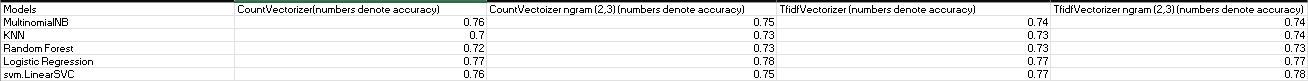

Upon findings, Logistic Regression multi class and svm.LinearSVC performed than most models across four types of experiments.

# Test each best model accuracy on test dataset.

In [ ]:
import pandas as pd
df = pd.read_csv('lemma_cw2_train.csv', encoding='utf-8')

In [ ]:
#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/lemma_cw2_train.csv'
df = pd.read_csv(url,index_col=0)
df

Drop null values and describe the dataset.

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,Unnamed: 0,overall,Review,review_text_length
0,0,5,I love these glitter pen . they sparkle deligh...,181
1,1,5,it work well with my machine .use mostly cone ...,57
2,2,5,"this begreat assortment of color , though ther...",318
3,3,5,just whatbe look for .,28
4,4,5,I make 400 bird for the hospital each month .,45


In [ ]:
df.describe()

,Unnamed: 0,overall,review_text_length
count,277398.000000,277398.000000,277398.000000
mean,175775.573194,4.509157,193.201224
std,107515.270646,0.984771,321.895593
min,0.000000,1.000000,1.000000
25%,81249.250000,4.000000,47.000000
50%,171351.000000,5.000000,107.000000
75%,267639.500000,5.000000,213.000000
max,370860.000000,5.000000,19323.000000


Split the dataset into train and test dataset.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
to_train, to_test=train_test_split(df, test_size=0.3, random_state=10)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

define count vectorizer

In [ ]:
cv = CountVectorizer()
X_train = cv.fit_transform(to_train['Review'])
X_train

<194178x105641 sparse matrix of type '<class 'numpy.int64'>'
	with 4712693 stored elements in Compressed Sparse Row format>

# Model 1: Logistic with Count Vectorizer

In [ ]:
#define the first model
model1 = LogisticRegression(multi_class="ovr")
model1.fit(X_train, to_train.overall)

C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [ ]:
#transform into matrix of token counts
X_test = cv.transform(to_test['Review'])

In [ ]:
y1 = model1.predict(X_test)

for train dataset we get 77% accuracy on X_test

In [ ]:
model1.score(X_train,to_train.overall)

0.8028046431624591

In [ ]:
model1.score(X_test,to_test.overall)

0.7709805335255948

Majority Score

In [ ]:
from sklearn.dummy import DummyClassifier
zeroR=DummyClassifier(strategy="most_frequent")
zeroR.fit(X_train, to_train.overall)
zeroR.score(X_test,to_test.overall)
# Your ZeroR classifier (Majority class classifier )

0.7376952655611632

test the model on test dataeset

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/test.csv'
test = pd.read_csv(url,index_col=0)
test

In [ ]:
test.head()

,id,Review
0,0,Wonderful asst. of wood carving tools
1,1,Pretty lace with 4 way stretch. I was exactly ...
2,2,This is a quick and easy way to start a crazy ...
3,3,"This is my favorite journals, the pages are ve..."
4,4,I bought this for a costume i was making. i wa...


In [ ]:
test.describe()

,id
count,123622.000000
mean,61810.500000
std,35686.741826
min,0.000000
25%,30905.250000
50%,61810.500000
75%,92715.750000
max,123621.000000


In [ ]:
#transform into matrix of token counts
x_test = cv.transform(test['Review'])


In [ ]:
y11=model1.predict(x_test)

In [ ]:
y11

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [ ]:
sample=pd.read_csv('sample_submission.csv') # submission of majority class

In [ ]:
sample.head()

,id,overall
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5


In [ ]:
sample['overall'] = y11

In [ ]:
sample.to_csv('Mysubmission1.csv', index=False)

After kaggle submission. the accuracy is 0.78515.

do the same steps for rest of the models.

# Model 2: Logistic with Count Vectorizer n gram (2nd best model for kaggle submission)

In [ ]:
cv_ngram = CountVectorizer(ngram_range = (2,3))
X_train = cv_ngram.fit_transform(to_train['Review'])
X_train

<194178x4127360 sparse matrix of type '<class 'numpy.int64'>'
	with 11872926 stored elements in Compressed Sparse Row format>

In [ ]:
#model 2
model2 = LogisticRegression(multi_class="ovr")
model2.fit(X_train, to_train.overall)

C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [ ]:
X_test = cv_ngram.transform(to_test['Review'])

In [ ]:
y2 = model2.predict(X_test)

In [ ]:
model2.score(X_train,to_train.overall)

0.9730505000566491

In [ ]:
model2.score(X_test,to_test.overall)

0.7772170151405912

In [ ]:
from sklearn.dummy import DummyClassifier
zeroR=DummyClassifier(strategy="most_frequent")
zeroR.fit(X_train, to_train.overall)
zeroR.score(X_test,to_test.overall)
# Your ZeroR classifier (Majority class classifier

0.7376952655611632

In [ ]:
test = pd.read_csv('test.csv')
test.head()

,id,Review
0,0,Wonderful asst. of wood carving tools
1,1,Pretty lace with 4 way stretch. I was exactly ...
2,2,This is a quick and easy way to start a crazy ...
3,3,"This is my favorite journals, the pages are ve..."
4,4,I bought this for a costume i was making. i wa...


In [ ]:
#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/test.csv'
test = pd.read_csv(url,index_col=0)
test

In [ ]:
x_test = cv_ngram.transform(test['Review'])

In [ ]:
y22=model2.predict(x_test)

In [ ]:
sample=pd.read_csv('sample_submission.csv') # submission of majority class
sample['overall'] = y22
sample.to_csv('Mysubmission2.csv', index=False)

after kaggle submission, the accuracy is 0.79572 which is second best model

# Model 3: svm with tfidf


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tdidf = TfidfVectorizer()
X_train = tdidf.fit_transform(to_train['Review'])
X_train

<194178x105641 sparse matrix of type '<class 'numpy.float64'>'
	with 4712693 stored elements in Compressed Sparse Row format>

In [ ]:
#model 3
from sklearn import svm
model3 = svm.LinearSVC(random_state=20)
model3.fit(X_train, to_train.overall)

C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=20)

In [ ]:
X_test = tdidf.transform(to_test['Review'])
y3 = model3.predict(X_test)

In [ ]:
model3.score(X_train,to_train.overall)

0.8542934832988289

In [ ]:
model3.score(X_test,to_test.overall)

0.7715092525835135

In [ ]:
from sklearn.dummy import DummyClassifier
zeroR=DummyClassifier(strategy="most_frequent")
zeroR.fit(X_train, to_train.overall)
zeroR.score(X_test,to_test.overall)
# Your ZeroR classifier (Majority class classifier

0.7376952655611632

In [ ]:
test = pd.read_csv('test.csv')
test.head()

,id,Review
0,0,Wonderful asst. of wood carving tools
1,1,Pretty lace with 4 way stretch. I was exactly ...
2,2,This is a quick and easy way to start a crazy ...
3,3,"This is my favorite journals, the pages are ve..."
4,4,I bought this for a costume i was making. i wa...


In [ ]:
#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/test.csv'
test = pd.read_csv(url,index_col=0)
test

In [ ]:
x_test = tdidf.transform(test['Review'])

In [ ]:
y33=model3.predict(x_test)

In [ ]:
sample=pd.read_csv('sample_submission.csv') # submission of majority class
sample['overall'] = y33
sample.to_csv('Mysubmission3.csv', index=False)

after kaggle submission, the accuracy is 0.77652

# Model 4: svm with tfidf ngram(Best model for kaggle submission accuracy 0.80127 MySubmission4.csv)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_ngram = TfidfVectorizer(ngram_range = (2,3))
X_train = tfidf_ngram.fit_transform(to_train['Review'])
X_train

<194178x4127360 sparse matrix of type '<class 'numpy.float64'>'
	with 11872926 stored elements in Compressed Sparse Row format>

In [ ]:
#model 4
from sklearn import svm
model4 = svm.LinearSVC(random_state=20)
model4.fit(X_train, to_train.overall)

C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=20)

In [ ]:
X_test = tfidf_ngram.transform(to_test['Review'])
y4 = model4.predict(X_test)

In [ ]:
model4.score(X_train,to_train.overall)

0.9853536445941353

In [ ]:
model4.score(X_test,to_test.overall)

0.7788872867099255

In [ ]:
test = pd.read_csv('test.csv')
test.head()

,id,Review
0,0,Wonderful asst. of wood carving tools
1,1,Pretty lace with 4 way stretch. I was exactly ...
2,2,This is a quick and easy way to start a crazy ...
3,3,"This is my favorite journals, the pages are ve..."
4,4,I bought this for a costume i was making. i wa...


In [ ]:
#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/test.csv'
test = pd.read_csv(url,index_col=0)
test

In [ ]:
x_test = tfidf_ngram.transform(test['Review'])
y44=model4.predict(x_test)


In [ ]:
print(y44)

[5 5 5 ... 5 5 5]


In [ ]:
sample=pd.read_csv('sample_submission.csv') # submission of majority class
sample['overall'] = y44
sample.to_csv('Mysubmission4.csv', index=False)

after kaggle submission, the accuracy is 0.80127 which is the best model.

# Findings on model's performance on test dataset

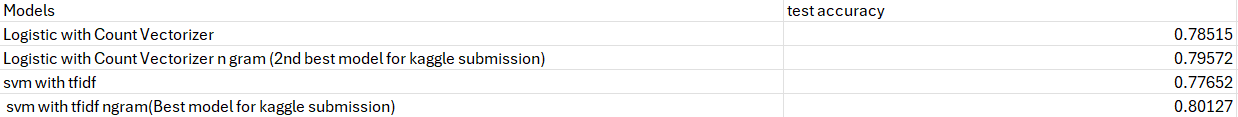

From above models, svm.LinearSVC with tf-idf 2,3 n-gram performed best on test dataset and is the top model accuracy on Kaggle competition.

# Improve model 4 baseline ( best accuracy 0.80354, MySubmission4_3.csv)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_ngram = TfidfVectorizer(ngram_range = (1,2))
X_train = tfidf_ngram.fit_transform(to_train['Review'])
X_train

<194178x1165975 sparse matrix of type '<class 'numpy.float64'>'
	with 10654791 stored elements in Compressed Sparse Row format>

In [ ]:
#model 4
from sklearn import svm
from sklearn.linear_model import LogisticRegression
model4 = svm.LinearSVC(random_state=20)
model4.fit(X_train, to_train.overall)

C:\Users\nihal\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=20)

In [ ]:
X_test = tfidf_ngram.transform(to_test['Review'])
y4 = model4.predict(X_test)

In [ ]:
model4.score(X_train,to_train.overall)

0.9673752948325763

In [ ]:
model4.score(X_test,to_test.overall)

0.7818553232396058

In [ ]:
test = pd.read_csv('test.csv')
test.head()

,id,Review
0,0,Wonderful asst. of wood carving tools
1,1,Pretty lace with 4 way stretch. I was exactly ...
2,2,This is a quick and easy way to start a crazy ...
3,3,"This is my favorite journals, the pages are ve..."
4,4,I bought this for a costume i was making. i wa...


In [ ]:
#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/test.csv'
test = pd.read_csv(url,index_col=0)
test

In [ ]:
x_test = tfidf_ngram.transform(test['Review'])
y44=model4.predict(x_test)

In [ ]:
sample=pd.read_csv('sample_submission.csv') # submission of majority class
sample['overall'] = y44
sample.to_csv('Mysubmission4_3.csv', index=False)

# 5.	Modelling text as a Sequence by Nihal Patel

# LSTM model

For this task, We have selected LSTM Sequential model since it has a memory that remembers vital information for sequence to sequence. Also LSTM is good for long sentences.

In [ ]:
#read the train dataset and reducet the dataset size.
import pandas as pd
df = pd.read_csv('/content/sample_data/train.csv', encoding='utf-8')

In [ ]:
#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/train.csv'
df = pd.read_csv(url,index_col=0)
df

In [ ]:
min_samples = 3000

df_one = df[df['overall'] == 1].sample(min_samples, random_state=2024)
df_two = df[df['overall'] == 2].sample(min_samples, random_state=2024)
df_three = df[df['overall'] == 3].sample(min_samples, random_state=2024)
df_four = df[df['overall'] == 4].sample(min_samples, random_state=2024)
df_five = df[df['overall'] == 5].sample(min_samples, random_state=2024)

In [ ]:
df = pd.concat([df_one,df_two,df_three,df_four,df_five], axis=0)
df

,overall,Review
195311,1,"I was excited when it came in, but when I went..."
366637,1,You could only buy a ton or 1 yard. Would be g...
189853,1,I ordered this because I thought it would be a...
327073,1,Shame on Singer! They are setting kids up for ...
271612,1,Awful Paint. It would be pretty but it gets cl...
...,...,...
104958,5,Great item. Does exactly what I need it to do....
266837,5,"I really love these magnets, hold the pattern ..."
321168,5,Works perfect for painting my pottery and so f...
364397,5,Like sugar 'n cream for kitchen projects.


Import the required libraries.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

define vocabulary size, embedding dimension and max length.

In [ ]:
vocab_size = 68000
embedding_dim = 100
max_length = 5000

Store the data into two columns.

In [ ]:
review = df['Review']
overall = df['overall']

Split the dataser into train and validation on train size.

In [ ]:
train_size = int(len(review) * 0.8)

train_review = review[0: train_size]
train_overall = overall[0: train_size]

validation_review = review[train_size:]
validation_overall = overall[train_size:]

print(train_size)
print(len(train_review))
print(len(train_overall))
print(len(validation_review))
print(len(validation_overall))

12000
12000
12000
3000
3000


Tokenize the sentence on reviews by using lower, filter and index.

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size,filters='!"#$%&()*+,-./:;<=>?~',lower=True)
tokenizer.fit_on_texts(train_review)
word_index = tokenizer.word_index

Turn tokens into sequences.

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_review)

In [ ]:
print(train_sequences[10])

[66, 492, 114, 162, 307, 22, 780, 1, 95, 9, 622, 178, 17, 1, 1095, 10, 9, 11, 622, 178, 4, 9, 6, 344, 149, 74, 401, 15, 344, 550, 7, 1, 384, 95, 7, 68, 5, 75, 3540, 161, 1, 72, 9, 297]


Use padding to have sequences of same size.

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='pre')

In [ ]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

65
5000
35
5000
44
5000


Do the same staps for validation reviews.

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_review)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding='pre')

print(len(validation_sequences))
print(validation_padded.shape)

3000
(3000, 5000)


In [ ]:
train_overall

195311    1
366637    1
189853    1
327073    1
271612    1
         ..
302935    4
206682    4
207715    4
49843     4
267640    4
Name: overall, Length: 12000, dtype: int64

In [ ]:
print(set(train_overall))

{1, 2, 3, 4}


In [ ]:
training_label_seq = np.array((train_overall))
validation_label_seq = np.array((validation_overall))

In [ ]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

1
1
1
(12000,)
5
5
5
(3000,)


Define Sequential model with an embedding layer which converts sequence of words into vectors with vocab size and embedding dim as parameters.

Bidirectional propagates backwards and concatenates output which supports long sentences.

Dense layer with softmax activation function.

Model summary is printed below.


In [ ]:
model = tf.keras.Sequential([

    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),

    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 100)         6800000   
                                                                 
 bidirectional_5 (Bidirecti  (None, 200)               160800    
 onal)                                                           
                                                                 
 dense_11 (Dense)            (None, 6)                 1206      
                                                                 
Total params: 6962006 (26.56 MB)
Trainable params: 6962006 (26.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


loss function is sparse categorical crossentropy with metric accuracy and adam optimizer,

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train the model on 5 epcohs.

In [ ]:
num_epochs = 5
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq))

Epoch 1/5
375/375 [==============================] - 5624s 15s/step - loss: 1.2546 - accuracy: 0.3861 - val_loss: 8.5530 - val_accuracy: 0.0000e+00
Epoch 2/5
375/375 [==============================] - 5632s 15s/step - loss: 0.9938 - accuracy: 0.5551 - val_loss: 9.4852 - val_accuracy: 0.0000e+00
Epoch 3/5
375/375 [==============================] - 5670s 15s/step - loss: 0.8275 - accuracy: 0.6559 - val_loss: 9.8637 - val_accuracy: 0.0000e+00
Epoch 4/5
375/375 [==============================] - 5282s 14s/step - loss: 0.6744 - accuracy: 0.7334 - val_loss: 11.1930 - val_accuracy: 0.0000e+00
Epoch 5/5
375/375 [==============================] - 5549s 15s/step - loss: 0.5567 - accuracy: 0.7894 - val_loss: 10.9300 - val_accuracy: 0.0000e+00


Final accuracy is 0.7894

Compared to previous bag of words model, it performed best on level with logistic and svm models. Although given the time needed to train the model. Accuray around 99% is expected at epoch 8 or 9. Filter is used that is somewhat similar to regex

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

readings = [[1,0.3861],[2,0.5551,],[3,0.6559],[4,0.7334],[5,0.7894]]

In [ ]:
data = pd.DataFrame(readings, columns=['epoch','accuracy'])

Graph on accuracy and loss. There is a big increase in accuracy from epoch 1 to 2.
In terms of loss, the loss decrease from epoch 2 onwards.

<Axes: xlabel='epoch'>

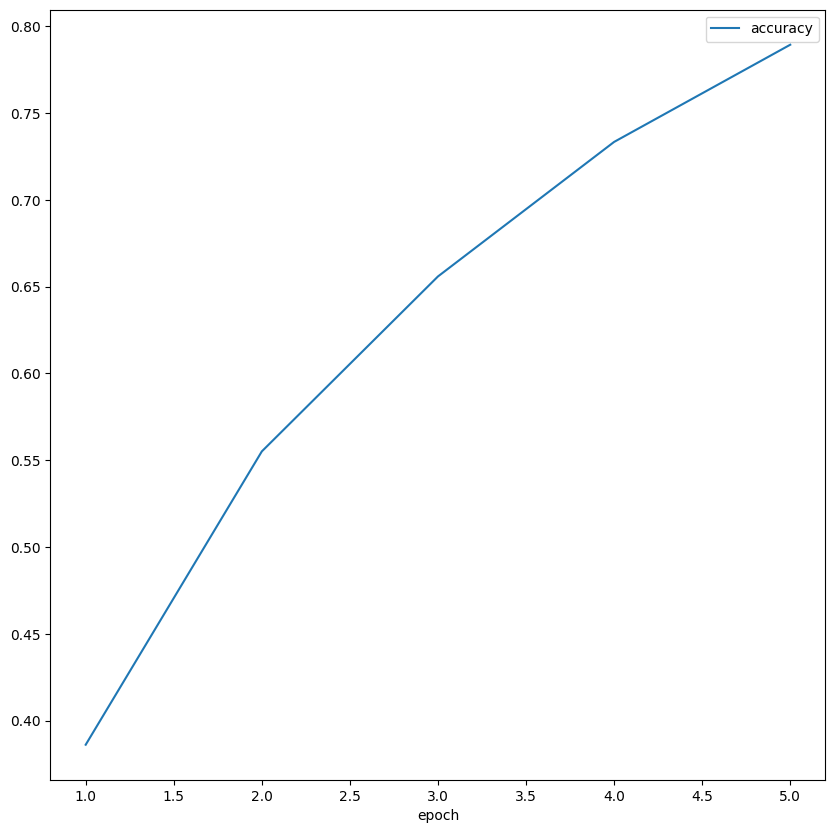

In [ ]:
data.plot(x="epoch",y="accuracy",kind="line",figsize=(10,10))

In [ ]:
loss = [[1,1.2546],[2,0.9938,],[3,0.8275],[4,0.6744],[5,0.5567]]

In [ ]:
loss_data = pd.DataFrame(loss, columns=['epoch','loss'])

<Axes: xlabel='epoch'>

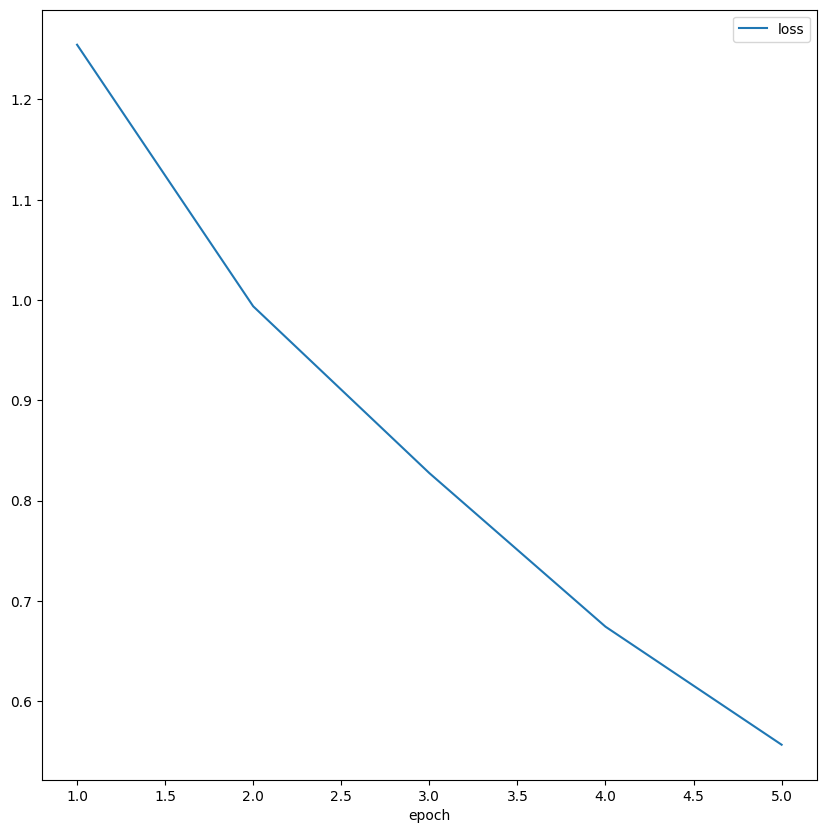

In [ ]:
loss_data.plot(x="epoch",y="loss",kind="line",figsize=(10,10))

#Fasttext model

Fasttext is better choice than word2vec since it allows to train custom word embeddings for custom domain. It is also a library.

Read the dataset.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/lemma_cw2_train.csv', encoding='utf-8')

In [ ]:
#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/lemma_cw2_train.csv'
df = pd.read_csv(url,index_col=0)
df

Installing the fasttext library.

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199772 sha256=b1ccce948558902b7bcae701aadcfadb29318205bf9ab2cbe0dbb60f134ec933
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


When doing classification using fast text. it expects to have both rating and review under single column but separated by space.

In [ ]:
df['overall'] = '__label__' + df['overall'].astype(str)


In [ ]:
df['overall_review'] = df['overall'] + " " + df['Review']

In [ ]:
df

,Unnamed: 0,overall,Review,review_text_length,overall_review
0,0,__label__5,I love these glitter pen . they sparkle deligh...,181,__label__5 I love these glitter pen . they spa...
1,1,__label__5,it work well with my machine .use mostly cone ...,57,__label__5 it work well with my machine .use m...
2,2,__label__5,"this begreat assortment of color , though ther...",318,"__label__5 this begreat assortment of color , ..."
3,3,__label__5,just whatbe look for .,28,__label__5 just whatbe look for .
4,4,__label__5,I make 400 bird for the hospital each month .,45,__label__5 I make 400 bird for the hospital ea...
...,...,...,...,...,...
277409,370856,__label__5,these be the perfect application bottle for di...,343,__label__5 these be the perfect application bo...
277410,370857,__label__4,I mainly purchase this for the roll - up penci...,796,__label__4 I mainly purchase this for the roll...
277411,370858,__label__5,I love these die they make great background fo...,59,__label__5 I love these die they make great ba...
277412,370859,__label__5,I love Darice emboss folder . Darcie 's folder...,138,__label__5 I love Darice emboss folder . Darci...


Split the dataset into train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(df, test_size=0.2)

In [ ]:
train_dataset.shape

(221931, 5)

In [ ]:
test_dataset.shape

(55483, 5)

Save train and test dataset into csv files.

In [ ]:
train_dataset.to_csv('train_review',columns=['overall_review'], index=False, header=False)
test_dataset.to_csv('test_review',columns=['overall_review'], index=False, header=False)

Import library and train the model on train csv file.

In [ ]:
import fasttext

model=fasttext.train_supervised('/content/train_review')

Test the model on test csv file.

In [ ]:
import fasttext

model.test('/content/test_review')

(32983, 0.8037473850165237, 0.8037473850165237)

first param is test size, second param is precision and third param is recall.

Predict the label on review.

In [ ]:
model.predict('great product and will order again ! these be well make zipper and price reasonably .have use they in several of my project')

(('__label__5',), array([0.94885588]))

In [ ]:
model.predict('these be not real Swarovski ..... so buyer beware ....')

(('__label__1',), array([0.57912993]))

It scored a precision of 80% on test data. It is trained on lemma train dataset.

# Research Question Experiments.

Read the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/lemma_cw2_train.csv', encoding='utf-8')

In [ ]:
#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/lemma_cw2_train.csv'
df = pd.read_csv(url,index_col=0)
df

# FastText

As per fasttext documentation concatenate both review and overall.

In [ ]:
df['overall'] = '__label__' + df['overall'].astype(str)

In [ ]:
df['overall_review'] = df['overall'] + " " + df['Review']

In [ ]:
df

,Unnamed: 0,overall,Review,review_text_length,overall_review
0,0,__label__5,I love these glitter pen . they sparkle deligh...,181,__label__5 I love these glitter pen . they spa...
1,1,__label__5,it work well with my machine .use mostly cone ...,57,__label__5 it work well with my machine .use m...
2,2,__label__5,"this begreat assortment of color , though ther...",318,"__label__5 this begreat assortment of color , ..."
3,3,__label__5,just whatbe look for .,28,__label__5 just whatbe look for .
4,4,__label__5,I make 400 bird for the hospital each month .,45,__label__5 I make 400 bird for the hospital ea...
...,...,...,...,...,...
277409,370856,__label__5,these be the perfect application bottle for di...,343,__label__5 these be the perfect application bo...
277410,370857,__label__4,I mainly purchase this for the roll - up penci...,796,__label__4 I mainly purchase this for the roll...
277411,370858,__label__5,I love these die they make great background fo...,59,__label__5 I love these die they make great ba...
277412,370859,__label__5,I love Darice emboss folder . Darcie 's folder...,138,__label__5 I love Darice emboss folder . Darci...


In [ ]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(df, test_size=0.2)

In [ ]:
train_dataset.shape

(221931, 5)

In [ ]:
test_dataset.shape

(55483, 5)

Save train and test data to csv file

In [ ]:
train_dataset.to_csv('train_review',columns=['overall_review'], index=False, header=False)
test_dataset.to_csv('test_review',columns=['overall_review'], index=False, header=False)

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227140 sha256=5d3ea9d0f38a8ff3b0247db5b4c27e1818c92da18d2b0cc5508c0a5ed68796dc
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


Train and test the model

In [ ]:
import fasttext

model=fasttext.train_supervised('/content/train_review')

In [ ]:
import fasttext

model.test('/content/test_review')

(32898, 0.8019028512371573, 0.8019028512371573)

In [ ]:
model.predict('great product and will order again ! these be well make zipper and price reasonably .have use they in several of my project')

(('__label__5',), array([0.94999623]))

In [ ]:
model.get_nearest_neighbors('yarn')

[(0.9759492874145508, 'shortcut'),
 (0.9755513072013855, 'disengage'),
 (0.9750639796257019, 'Dotz'),
 (0.9746534824371338, 'through'),
 (0.974172830581665, 'underpiece'),
 (0.9692556858062744, 'up'),
 (0.9665941596031189, 'cutclean'),
 (0.9656050205230713, 'real'),
 (0.9625496864318848, 'orcard'),
 (0.9612668752670288, 'forbeading')]

In [ ]:
model.save_model("model_fasttext.model") #save your models

# Word2Vec

Read dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/lemma_cw2_train.csv', encoding='utf-8')

In [ ]:
#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/lemma_cw2_train.csv'
df = pd.read_csv(url,index_col=0)
df

Create word2vec model and save

In [ ]:
df = df.dropna()

In [ ]:
import gensim
from gensim.models import Word2Vec
model_w2v = gensim.models.Word2Vec(df['Review'].to_list(),min_count=10, window = 4, vector_size = 100)

In [ ]:
model_w2v.save("model_w2v.model") #save your models

In [ ]:
#snippet code for training

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/train.csv', encoding='utf-8')

In [ ]:
#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/train.csv'
df = pd.read_csv(url,index_col=0)
df

In [ ]:
min_samples = 3000

df_one = df[df['overall'] == 1].sample(min_samples, random_state=2024)
df_two = df[df['overall'] == 2].sample(min_samples, random_state=2024)
df_three = df[df['overall'] == 3].sample(min_samples, random_state=2024)
df_four = df[df['overall'] == 4].sample(min_samples, random_state=2024)
df_five = df[df['overall'] == 5].sample(min_samples, random_state=2024)

In [ ]:
df = pd.concat([df_one,df_two,df_three,df_four,df_five], axis=0)
df

,overall,Review
195311,1,"I was excited when it came in, but when I went..."
366637,1,You could only buy a ton or 1 yard. Would be g...
189853,1,I ordered this because I thought it would be a...
327073,1,Shame on Singer! They are setting kids up for ...
271612,1,Awful Paint. It would be pretty but it gets cl...
...,...,...
104958,5,Great item. Does exactly what I need it to do....
266837,5,"I really love these magnets, hold the pattern ..."
321168,5,Works perfect for painting my pottery and so f...
364397,5,Like sugar 'n cream for kitchen projects.


Import the required libraries.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

define vocabulary size, embedding dimension and max length.

In [ ]:
vocab_size = 68000
embedding_dim = 100
max_length = 5000

Store the data into two columns.

In [ ]:
review = df['Review']
overall = df['overall']

Split the dataser into train and validation on train size.

In [ ]:
train_size = int(len(review) * 0.8)

train_review = review[0: train_size]
train_overall = overall[0: train_size]

validation_review = review[train_size:]
validation_overall = overall[train_size:]

print(train_size)
print(len(train_review))
print(len(train_overall))
print(len(validation_review))
print(len(validation_overall))

12000
12000
12000
3000
3000


Tokenize the sentence on reviews by using lower, filter and index.

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size,filters='!"#$%&()*+,-./:;<=>?~',lower=True)
tokenizer.fit_on_texts(train_review)
word_index = tokenizer.word_index

Turn tokens into sequences.

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_review)

In [ ]:
print(train_sequences[10])

[66, 492, 114, 162, 307, 22, 780, 1, 95, 9, 622, 178, 17, 1, 1095, 10, 9, 11, 622, 178, 4, 9, 6, 344, 149, 74, 401, 15, 344, 550, 7, 1, 384, 95, 7, 68, 5, 75, 3540, 161, 1, 72, 9, 297]


Use padding to have sequences of same size.

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='pre')

In [ ]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

65
5000
35
5000
44
5000


Do the same staps for validation reviews.

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_review)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding='pre')

print(len(validation_sequences))
print(validation_padded.shape)

3000
(3000, 5000)


In [ ]:
train_overall

195311    1
366637    1
189853    1
327073    1
271612    1
         ..
302935    4
206682    4
207715    4
49843     4
267640    4
Name: overall, Length: 12000, dtype: int64

In [ ]:
print(set(train_overall))

{1, 2, 3, 4}


In [ ]:
training_label_seq = np.array((train_overall))
validation_label_seq = np.array((validation_overall))

In [ ]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

1
1
1
(12000,)
5
5
5
(3000,)


In [ ]:
model_fast = fasttext.load_model('/content/model_fasttext.model') # load fasttext model

Define Sequential model with an embedding layer which converts sequence of words into vectors with vocab size and embedding dim as parameters.

Bidirectional propagates backwards and concatenates output which supports long sentences.

Dense layer with softmax activation function.

Model summary is printed below.


In [ ]:
embedding_matrix = np.zeros((vocab_size, model_fast.get_dimension()))
for word, i in tokenizer.word_index.items():
  if word in model_fast:
    embedding_matrix[i] = model_fast[word]

In [ ]:
model = tf.keras.Sequential([

    tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),

    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         6800000   
                                                                 
 bidirectional (Bidirection  (None, 200)               160800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 6)                 1206      
                                                                 
Total params: 6962006 (26.56 MB)
Trainable params: 6962006 (26.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


loss function is sparse categorical crossentropy with metric accuracy and adam optimizer,

Train the model on single epcoh.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 1
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq))

375/375 [==============================] - 5432s 14s/step - loss: 1.1432 - accuracy: 0.4725 - val_loss: 9.9619 - val_accuracy: 0.0000e+00


In [ ]:
#word2vec accuracy
model_w2v = gensim.models.Word2Vec.load("model_w2v.model")

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
  if word in model_w2v.wv:
    embedding_matrix[i] = model_w2v.wv[word]

In [ ]:
model = tf.keras.Sequential([

    tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),

    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         6800000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               160800    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 6)                 1206      
                                                                 
Total params: 6962006 (26.56 MB)
Trainable params: 6962006 (26.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 1
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq))

375/375 [==============================] - 5230s 14s/step - loss: 1.2667 - accuracy: 0.3812 - val_loss: 8.9774 - val_accuracy: 0.0000e+00


# GLOVE

In [ ]:
#glove accuracy

Read the file

In [ ]:
embedding_glove_index = {};
with open('/content/sample_data/glove.6B.50d.txt') as glove_file:
   for line in glove_file:
    values = line.split();
    word = values[0];
    coefficients = np.asarray(values[1:], dtype='float32')
    embedding_glove_index[word] = coefficients


print embedding matrix

In [ ]:
embedding_glove_index

{'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
       dtype=float32),
 ',': array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
        -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
        -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
        -0.4

Create a lookup table

In [ ]:
embedding_matrix = np.zeros((vocab_size, 50))
for word, i in tokenizer.word_index.items():
  embeddings = embedding_glove_index.get(word)
  if embeddings is not None:
    embedding_matrix[i] = embeddings

In [ ]:
model = tf.keras.Sequential([

    tf.keras.layers.Embedding(vocab_size, 50, weights=[embedding_matrix]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),

    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          3400000   
                                                                 
 bidirectional (Bidirection  (None, 100)               40400     
 al)                                                             
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 3441006 (13.13 MB)
Trainable params: 3441006 (13.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 1
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq))

375/375 [==============================] - 3350s 9s/step - loss: 1.3373 - accuracy: 0.3405 - val_loss: 8.1287 - val_accuracy: 0.0000e+00


# Topic Modelling of high and low ratings by Nihal Patel

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/lemma_cw2_train.csv', encoding='utf-8')

In [ ]:
#alternate option to read the file, if the file the read from google colab does not work above
import pandas as pd
url = 'https://raw.githubusercontent.com/nihalpatel99/cw2/main/lemma_cw2_train.csv'
df = pd.read_csv(url,index_col=0)
df

take small subset of dataset of one ratings and five ratings.

In [ ]:
min_samples = 3000

df_one = df[df['overall'] == 1].sample(min_samples, random_state=2024)
df_five = df[df['overall'] == 5].sample(min_samples, random_state=2024)

In [ ]:
df = pd.concat([df_one,df_five], axis=0)
df

,Unnamed: 0,overall,Review,review_text_length
16309,17963,1,product return . the winder do not wind evenly...,128
222233,288345,1,guess it bewith the problem . read many review...,457
141857,175658,1,not the color greenbe expect as show on the pi...,124
101695,122384,1,very poor quality .guess you get what you pay for,52
148763,184971,1,"please , if you want to use this glue ( despit...",1186
...,...,...,...,...
141697,175444,5,sogetburn hole in my absolute favorite hoodie ...,844
16964,18704,5,cut very good . large size font .,32
11833,12911,5,just fine,9
62553,72849,5,high quality watercolor pen . great gift idea ...,50


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=1000, max_df=.15)
X = vect.fit_transform(df['Review'])

Import the library.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

Create the object

In [ ]:
lda = LatentDirichletAllocation(n_components=15, learning_method="batch",
                                max_iter=15, random_state=0)

document_topics = lda.fit_transform(X)

In [ ]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (15, 1000)


In [ ]:
import numpy as np

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

feature_names = np.array(vect.get_feature_names_out())

In [ ]:

print(feature_names[sorting])

[['paper' 'quality' 'good' ... 'plier' 'mom' 'battery']
 ['all' 'at' 'out' ... 'feature' 'heart' 'floss']
 ['get' 'try' 'just' ... 'collection' 'condition' 'bleed']
 ...
 ['great' 'price' 'as' ... 'zero' 'liner' 'olfa']
 ['machine' 'thread' 'sewing' ... 'charm' 'olfa' 'rotary']
 ['glue' 'hook' 'stick' ... 'software' 'holtz' 'sizzix']]


In [ ]:
!pip install mglearn

In [ ]:
%matplotlib inline
import mglearn as mglearn
import matplotlib as plt

Print out 15 topics.

Topic 0: Talks about poor paper quality on current brand - 1 star<br>
Topic 1: Similar dry ink pen from amazon - 5 stars <br>
Topic 2: defects in product - 1 star <br>
Topic 3: paint brush and smell - 5 stars <br>
Topic 4: Dissapointed in package - 1 star <br>
Topic 5: Interested in buying one more yarn - 5 stars<br>
Topic 6: Nice stamp and crafts - 5 stars <br>
Topic 7: pretty color pencil and marker - 5 stars <br>
Topic 8: Money wasted on product - 1 star <br>
Topic 9: size needle smaller or larger - 5 stars <br>
Topic 10: Likes the look of the product as compared to another products 5 star <br>
Topic 11: Scissors, cutter and other tools <br>
Topic 12: Buy again and recommend the product - 5 stars <br>
Topic 13: Machine sewing needle <br>
Topic 14: glue and hook sticks well <br>

In [ ]:
mglearn.tools.print_topics(topics=range(15), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
paper         all           get           cut           break         
quality       at            try           die           small         
good          out           just          paper         one           
punch         get           can           or            off           
if            pen           out           mat           too           
poor          one           could         one           would         
as            dry           no            sheet         come          
even          well          make          make          will          
all           ink           there         from          order         
pad           only          one           well          pin           
get           buy           only          card          disappointed  
thin          price         after         out           all           
can   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head(10)

,Unnamed: 0,overall,Review,review_text_length
16309,17963,1,product return . the winder do not wind evenly...,128
222233,288345,1,guess it bewith the problem . read many review...,457
141857,175658,1,not the color greenbe expect as show on the pi...,124
101695,122384,1,very poor quality .guess you get what you pay for,52
148763,184971,1,"please , if you want to use this glue ( despit...",1186
38260,43463,1,waste of money .,15
26408,29560,1,too thin and very difficult to work with . it ...,260
68398,80053,1,do not work .,13
59757,69341,1,I have to return this product due to awful sme...,58
246109,323611,1,I need the fine tip pen for my Cricut Explore ...,518


In [ ]:
df['Review'][205160]

'this product may be great depend on your intend use . however ,be use it forscrapbook andvariety of random art project ( e.g. , popup card ) . base on my use ,have the follow criticism of the product : ( 1 ) PLASTIC ADHESIVE TAPE : this product be well describe as tape , not lace . it may be describe as paper thin , plastic adhesive . as such , it do not look at all like lace . ( 2 ) THIN , SEE - THROUGH : the product be very thin , which cause it to be partially see - through when apply to paper of contrast color . it also look rather cheap because it be so thin . ( 3 ) imperfect pattern : the " lace " that be depict have hole that give itlace - like pattern . however , the tape do not have all the hole pre - detach . whenpeel it from its backing the hole still do not detach . therefore , the pattern in the tape look fairly bad .'

In [ ]:
df['Review'][26408]

'too thin and very difficult to work with . it be hard to even trace the pattern on this thin and uneven material . cut it out bechallenge as well since it basically be like cut tissue paper . Tracing paper be much easy to wor ,with in my opinion .'

In [ ]:
df['Review'][141857]

'not the color greenbe expect as show on the picture . the productreceive the green color look dull not bright .'

In [ ]:
df['Review'][16309]

'product return . the winder do not wind evenly and there be no way to control the speed as you would on your sewing machine .'

Above is 1 star reviews:
1. 16309 relates to topic 8
2. 141857 relates to topic 4
3. 26408 relates to topic 13
4. 205160 relates to topic 2



In [ ]:
df.tail(10)

,Unnamed: 0,overall,Review,review_text_length
166100,208570,5,these be great for use with the cinch book bin...,63
237085,310270,5,these die be perfect for layer whenbe do paper...,65
124205,151931,5,fit most size yarn perfectly and as long as yo...,94
218313,282583,5,I get this as an accessory forsilhouette devic...,254
59455,68978,5,perfect with great hold on tiny area !,38
141697,175444,5,sogetburn hole in my absolute favorite hoodie ...,844
16964,18704,5,cut very good . large size font .,32
11833,12911,5,just fine,9
62553,72849,5,high quality watercolor pen . great gift idea ...,50
144366,179072,5,very cute project for kid and the one my grand...,246


In [ ]:
df['Review'][144366]

'very cute project for kid and the one my granddaughter pick as one of she " have to have , Grandma " toy for Christmas .love the fact that it be not justtoy but something for her Mom and she to work on together .double win for Christmas !'

In [ ]:
df['Review'][124205]

'fit most size yarn perfectly and as long as you find the center thread it work likecharm !'

In [ ]:
df['Review'][218313]

'I get this as an accessory forsilhouette device . it begreat item to have and will increase the versatility of the printer .be tell that this be well use with the gel pen . impressive what you can do with it . buy one , you will be glad you do .'

In [ ]:
df['Review'][59455]

'perfect with great hold on tiny area !'

Above is 5 star reviews:
1. 144336 relates to topic 5
2. 124205 relates to topic 6
3. 218313 relates to topic 12
4. 205160 relates to topic 6


In [ ]:
!pip install pyLDAvis

  Using cached pandas-2.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
!pip install "pandas<2.0.0"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
from __future__ import print_function
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1 star chart example where it talks about dissapointed product.

In [ ]:
pyLDAvis.lda_model.prepare(lda,X,vect)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.100511  0.050134       1        1  11.060408
13     0.104862 -0.053045       2        1   7.819835
1      0.090793  0.058869       3        1   7.648576
10     0.034657  0.098251       4        1   7.067127
4      0.077943  0.081004       5        1   6.857545
0      0.008795  0.017213       6        1   6.813033
3      0.055978 -0.080131       7        1   6.696496
2      0.090385 -0.011157       8        1   6.561540
5      0.057466  0.001765       9        1   6.519811
9     -0.040585 -0.061093      10        1   5.958082
14     0.058997 -0.047828      11        1   5.912456
7     -0.090778  0.207708      12        1   5.884088
12    -0.225611 -0.001543      13        1   5.608663
6     -0.354625 -0.045796      14        1   4.809128
11     0.031211 -0.214352      15        1   4.783212, topic_info=        Term        Freq        Total Category  logprob  loglift
185    color  905.000000   905.000000  Default  30.0000  30.0000
363    great  901.000000   901.000000  Default  29.0000  29.0000
487     love  741.000000   741.000000  Default  28.0000  28.0000
491  machine  656.000000   656.000000  Default  27.0000  27.0000
222      cut  693.000000   693.000000  Default  26.0000  26.0000
..       ...         ...          ...      ...      ...      ...
360     good   40.289257   690.344585  Topic15  -4.8653   0.1990
580      out   40.711552   848.592997  Topic15  -4.8549   0.0030
281     even   37.832177   567.793674  Topic15  -4.9282   0.3315
436     just   37.863342   858.347093  Topic15  -4.9274  -0.0810
494     make   37.951237  1120.515263  Topic15  -4.9251  -0.3452

[853 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         2  0.209163      00
0         3  0.752986      00
6         6  0.113884      24
6         7  0.075923      24
6         8  0.569422      24
...     ...       ...     ...
998      11  0.037612    zero
999       1  0.022308  zipper
999       9  0.847700  zipper
999      11  0.066924  zipper
999      15  0.022308  zipper

[3129 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 14, 2, 11, 5, 1, 4, 3, 6, 10, 15, 8, 13, 7, 12])

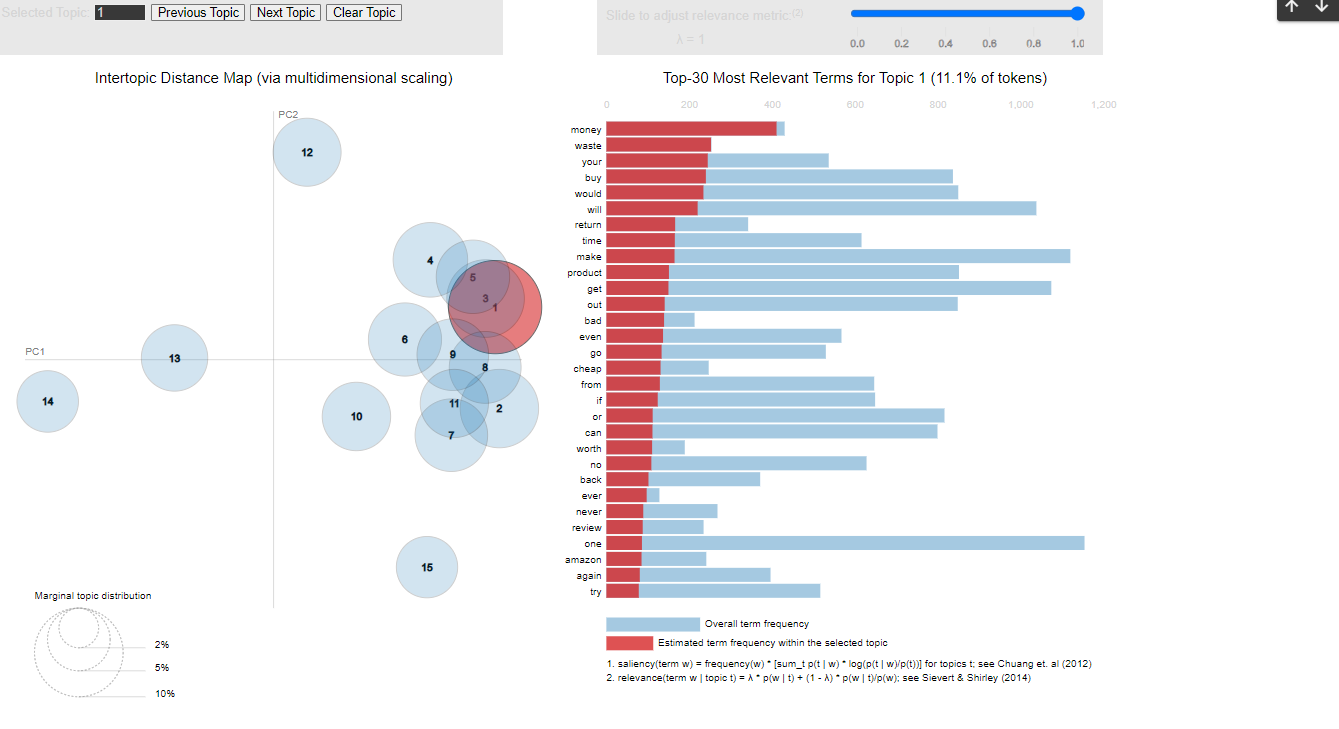

5 stars chart example where it talks about great stamp product.


In [ ]:
pyLDAvis.lda_model.prepare(lda,X,vect)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.100511  0.050134       1        1  11.060408
13     0.104862 -0.053045       2        1   7.819835
1      0.090793  0.058869       3        1   7.648576
10     0.034657  0.098251       4        1   7.067127
4      0.077943  0.081004       5        1   6.857545
0      0.008795  0.017213       6        1   6.813033
3      0.055978 -0.080131       7        1   6.696496
2      0.090385 -0.011157       8        1   6.561540
5      0.057466  0.001765       9        1   6.519811
9     -0.040585 -0.061093      10        1   5.958082
14     0.058997 -0.047828      11        1   5.912456
7     -0.090778  0.207708      12        1   5.884088
12    -0.225611 -0.001543      13        1   5.608663
6     -0.354625 -0.045796      14        1   4.809128
11     0.031211 -0.214352      15        1   4.783212, topic_info=        Term        Freq        Total Category  logprob  loglift
185    color  905.000000   905.000000  Default  30.0000  30.0000
363    great  901.000000   901.000000  Default  29.0000  29.0000
487     love  741.000000   741.000000  Default  28.0000  28.0000
491  machine  656.000000   656.000000  Default  27.0000  27.0000
222      cut  693.000000   693.000000  Default  26.0000  26.0000
..       ...         ...          ...      ...      ...      ...
360     good   40.289257   690.344585  Topic15  -4.8653   0.1990
580      out   40.711552   848.592997  Topic15  -4.8549   0.0030
281     even   37.832177   567.793674  Topic15  -4.9282   0.3315
436     just   37.863342   858.347093  Topic15  -4.9274  -0.0810
494     make   37.951237  1120.515263  Topic15  -4.9251  -0.3452

[853 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         2  0.209163      00
0         3  0.752986      00
6         6  0.113884      24
6         7  0.075923      24
6         8  0.569422      24
...     ...       ...     ...
998      11  0.037612    zero
999       1  0.022308  zipper
999       9  0.847700  zipper
999      11  0.066924  zipper
999      15  0.022308  zipper

[3129 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 14, 2, 11, 5, 1, 4, 3, 6, 10, 15, 8, 13, 7, 12])

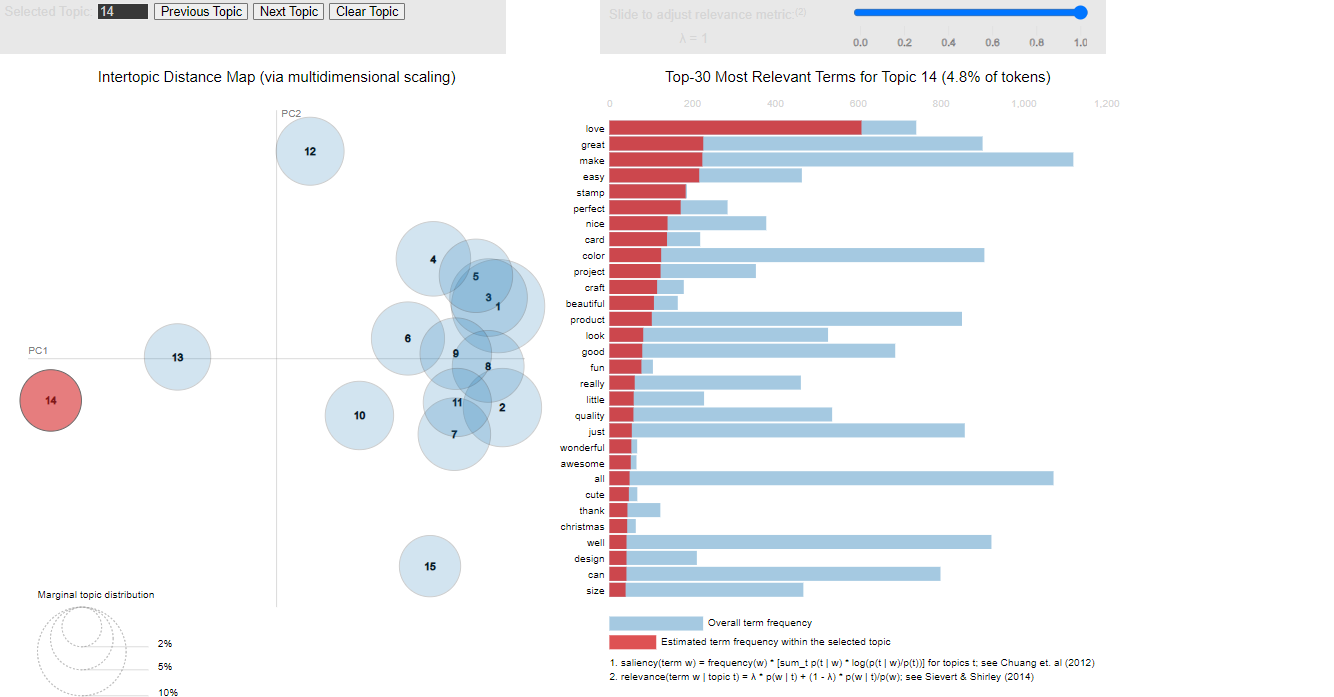

 Findings indicate that good reviews are in left quartile which is topic 12, 13 and 14 whereas rest of the topics are in right quartile.